# 1. Importing Libraries

In this section, I will import the libraries that I will use in this project. I will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing
- statsmodels for statistical modeling

In [1462]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 2. Loading the Data

In this section, I will load the data that I will use in this project. I will load the data from the CSV files using the pandas library. I will load the data into a pandas DataFrame.

In [1463]:
# Define path to data
file_path = "Data/"

# Load the data
fertiliser_use_df = pd.read_csv(file_path + "Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change_df = pd.read_csv(file_path + "Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
pesticides_use_df = pd.read_csv(file_path + "Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
crop_value_df = pd.read_csv(file_path + "Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv",low_memory=False)
food_balances_df = pd.read_csv(file_path + "Food balances indicators - FAOSTAT_data_en_2-22-2024.csv")
exchange_rate_df = pd.read_csv(file_path + "Exchange rate - FAOSTAT_data_en_2-22-2024.csv")

# 3. Data Preparation

In this section, I will prepare the data for analysis. For each of the dataframes, will perform the following steps:
- Explore the data
- Check for missing values
- Check for duplicate rows
- Drop unnecessary columns
- Group data if necessary to get totals and averages
- Rename value column to a more descriptive name for easier reference

## 3.1. Fertiliser Use Data

In [1464]:
# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [1465]:

# Describe the fertiliser use data
fertiliser_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [1466]:

# Print information about the fertiliser use data
fertiliser_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [1467]:

# Check for missing values
fertiliser_use_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [1468]:

# Check for duplicate rows
fertiliser_use_df.duplicated().sum()

0

In [1469]:
# Drop unnecessary columns
fertiliser_use_df = fertiliser_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Item Code", "Item", "Area Code (M49)"])

# Group data by country and year to get the total fertiliser use
fertiliser_use_df = fertiliser_use_df.groupby(["Area", "Year"]).sum().reset_index()

# Rename value column to total fertiliser use in tonnes
fertiliser_use_df = fertiliser_use_df.rename(columns={"Value": "Total Fertiliser Use in Tonnes"})

# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Area,Year,Total Fertiliser Use in Tonnes
0,Afghanistan,2002,17900.0
1,Afghanistan,2003,33200.0
2,Afghanistan,2004,90000.0
3,Afghanistan,2005,20577.0
4,Afghanistan,2006,68253.0


## 3.3. Land Temperature Change Data

In [1470]:
# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [1471]:
# Describe the land temperature change data
land_temperature_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [1472]:
# Print information about the land temperature change data
land_temperature_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [1473]:
# Filter land temperature change to get only meteorological year
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Months"] == "Meteorological year"]

# Split df into two dataframes: one for temperature change and one for standard deviation
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Temperature change"]
land_temperature_change_std_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Standard Deviation"]

# Drop unnecessary columns
land_temperature_change_df = land_temperature_change_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Months", "Months Code", "Area Code (M49)"])

# If all values for the country are missing, drop the country
land_temperature_change_df = land_temperature_change_df.groupby('Area').filter(lambda x: x[['Value']].notna().any().any())

# Impute missing values with the mean for the country
land_temperature_change_df['Value'] = land_temperature_change_df.groupby('Area',)['Value'].transform(lambda x: x.fillna(x.mean()))

In [1474]:
# Check for missing values
land_temperature_change_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1475]:
# Check for duplicate rows
land_temperature_change_df.duplicated().sum()

0

In [1476]:
# Rename value column to temperature change in degrees celsius
land_temperature_change_df = land_temperature_change_df.rename(columns={"Value": "Temperature Change in Degrees Celsius"})

# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Area,Year,Temperature Change in Degrees Celsius
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373


## 3.4. Pesticides Use Data

In [1477]:
# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [1478]:
# Describe the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [1479]:
# Print information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [1480]:
# Get only the total pesticides used and only Agricultural Use
pesticides_use_df = pesticides_use_df[(pesticides_use_df["Item Code"] == 1357) & (pesticides_use_df["Element"] == "Agricultural Use")]
# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Year Code", "Flag", "Flag Description", "Item Code", "Item", "Note", "Unit", "Element" , "Area Code (M49)" ])

# Check for missing values
pesticides_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1481]:
# Check for duplicate rows
pesticides_use_df.duplicated().sum()

0

In [1482]:
# Rename value column to total pesticides use in tonnes
pesticides_use_df = pesticides_use_df.rename(columns={"Value": "Total Pesticides Use in Tonnes"})

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Area,Year,Total Pesticides Use in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57


## 3.5. Crop Value Data

In [1483]:
# Display the first few rows of the crop value data
crop_value_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [1484]:
# Describe the crop value data
crop_value_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [1485]:
# Print information about the crop value data
crop_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [1486]:
# Drop unnecessary columns
crop_value_df = crop_value_df.drop(columns=["Domain", "Domain Code",  "Year Code", "Flag", "Flag Description", "Note", "Unit", "Item Code (CPC)", "Area Code (M49)"])

# Check for missing values
crop_value_df.isnull().sum()

Area            0
Element Code    0
Element         0
Item            0
Year            0
Value           0
dtype: int64

In [1487]:
# Split the data into two dataframes: one for imports and one for exports
crop_value_imports_df = crop_value_df[crop_value_df["Element"] == "Import Value"]
crop_value_exports_df = crop_value_df[crop_value_df["Element"] == "Export Value"]

# Drop unnecessary columns
crop_value_imports_df = crop_value_imports_df.drop(columns=["Element", "Element Code"])
crop_value_exports_df = crop_value_exports_df.drop(columns=["Element", "Element Code"])

# Rename value column to crop value in 1000 US$
crop_value_imports_df = crop_value_imports_df.rename(columns={"Value": "Total Import Crop Value in 1000 US$"})
crop_value_exports_df = crop_value_exports_df.rename(columns={"Value": "Total Export Crop Value in 1000 US$"})

# Display the first few rows of the crop import data
crop_value_imports_df.head()

,Area,Item,Year,Total Import Crop Value in 1000 US$
0,Afghanistan,Cereals and Preparations,1991,41600.0
1,Afghanistan,Cereals and Preparations,1992,25600.0
2,Afghanistan,Cereals and Preparations,1993,40000.0
3,Afghanistan,Cereals and Preparations,1994,25700.0
4,Afghanistan,Cereals and Preparations,1995,37720.0


In [1488]:
# Display the first few rows of the crop import data
crop_value_exports_df.head()

,Area,Item,Year,Total Export Crop Value in 1000 US$
19,Afghanistan,Cereals and Preparations,2009,15.0
21,Afghanistan,Cereals and Preparations,2010,54.0
23,Afghanistan,Cereals and Preparations,2011,0.0
25,Afghanistan,Cereals and Preparations,2012,0.0
27,Afghanistan,Cereals and Preparations,2013,0.0


## 3.6. Land Use Data

In [1489]:
# Display the first few rows of the land use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [1490]:
# Describe the land use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [1491]:
# Print information about the land use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [1492]:
# Filter to select only agricultural land
land_use_df = land_use_df[land_use_df["Item"] == "Agricultural land"]
# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Note", "Element", "Element Code", "Item Code", "Item", "Unit", "Area Code (M49)"])

# Check for missing values
land_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1493]:
# Check for duplicate rows
land_use_df.duplicated().sum()

0

In [1494]:
# Rename value column to agricultural land in hectares
land_use_df = land_use_df.rename(columns={"Value": "Agricultural Land in Hectares"})
# Display the first few rows of the land use data
land_use_df.head()

,Area,Year,Agricultural Land in Hectares
126,Afghanistan,1980,38049.0
127,Afghanistan,1981,38053.0
128,Afghanistan,1982,38054.0
129,Afghanistan,1983,38054.0
130,Afghanistan,1984,38054.0


## 3.7 Food Balances Data

In [1495]:
# Display the first few rows of the food balances data
food_balances_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [1496]:
# Describe the food balances data
food_balances_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,148041.000000,148041.000000,148041.000000,148041.000000,148041.000000
mean,425.675185,5429.812417,2015.549274,2015.549274,957.153400
std,251.359288,324.840991,3.452477,3.452477,9591.749593
min,4.000000,5123.000000,2010.000000,2010.000000,-62.000000
25%,204.000000,5142.000000,2013.000000,2013.000000,1.000000
50%,417.000000,5154.000000,2016.000000,2016.000000,25.000000
75%,642.000000,5611.000000,2019.000000,2019.000000,218.190000
max,894.000000,5911.000000,2021.000000,2021.000000,573218.000000


In [1497]:
# Print information about the food balances data
food_balances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [1498]:
# Drop unnecessary columns
food_balances_df = food_balances_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Unit", "Area Code (M49)", "Element Code", "Item Code (FBS)"])

# Remove rows where value is less than 0
food_balances_df = food_balances_df[food_balances_df["Value"] >= 0]

# Check for missing values
food_balances_df.isnull().sum()

Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64

In [1499]:
# Check for duplicate rows
food_balances_df.duplicated().sum()

0

In [1500]:
# Split data into imports and exports
food_balances_imports_df = food_balances_df[food_balances_df["Element"] == "Import Quantity"]
food_balances_exports_df = food_balances_df[food_balances_df["Element"] == "Export Quantity"]

# Rename value column to total quantity in tonnes
food_balances_imports_df = food_balances_imports_df.rename(columns={"Value": "Total Import Quantity in Tonnes"})
food_balances_exports_df = food_balances_exports_df.rename(columns={"Value": "Total Export Quantity in Tonnes"})

# Drop unnecessary columns
food_balances_imports_df = food_balances_imports_df.drop(columns=["Element"])
food_balances_exports_df = food_balances_exports_df.drop(columns=["Element"])

## 3.8 Exchange Rate Data

In [1501]:
# Display the first few rows of the exchange rate data
exchange_rate_df.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [1502]:
# Describe the exchange rate data
exchange_rate_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [1503]:
# Print information about the exchange rate data
exchange_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [1504]:
# Drop unnecessary columns
exchange_rate_df = exchange_rate_df.drop(columns=["Domain", "Domain Code", "Area Code (M49)", "Year Code", "Currency", "ISO Currency Code (FAO)", "Flag", "Flag Description", "Unit", "Element Code", "Element", "Months Code", "Months"])

# Check for missing values
exchange_rate_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1505]:
# Check for duplicate rows
exchange_rate_df.duplicated().sum()

24826

In [1506]:
# Rename value column to exchange rate in national currency per US dollar
exchange_rate_df = exchange_rate_df.rename(columns={"Value": "Exchange Rate in National Currency per US Dollar"})
# Average the exchange rate for each country per year
exchange_rate_df = exchange_rate_df.groupby(["Area", "Year"]).mean().reset_index()

# Display the first few rows of the exchange rate data
exchange_rate_df.head()

,Area,Year,Exchange Rate in National Currency per US Dollar
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606


# 3.8. Merging Data

In this section, I will merge all the dataframes into a single dataframe.


### 3.8.1 Mapping Items

In [1507]:
# Create a mapping of items to their respective categories
mapping = {
    'Cereals - Excluding Beer': 'Cereals and Preparations',
    'Starchy Roots': 'Other food',
    'Sugar Crops': 'Sugar and Honey',
    'Sugar & Sweeteners': 'Sugar and Honey',
    'Pulses': 'Other food',
    'Treenuts': 'Other food',
    'Oilcrops': 'Fats and Oils (excluding Butter)',
    'Vegetable Oils': 'Fats and Oils (excluding Butter)',
    'Vegetables': 'Fruit and Vegetables',
    'Fruits - Excluding Wine': 'Fruit and Vegetables',
    'Stimulants': 'Non-alcoholic Beverages',
    'Spices': 'Other food',
    'Alcoholic Beverages': 'Alcoholic Beverages',
    'Meat': 'Meat and Meat Preparations',
    'Eggs': 'Dairy Products and Eggs',
    'Milk - Excluding Butter': 'Dairy Products and Eggs',
    'Fish, Seafood': 'Other food'
}

# Map the items to their respective categories
food_balances_imports_df['Item'] = food_balances_imports_df['Item'].map(mapping)
food_balances_exports_df['Item'] = food_balances_exports_df['Item'].map(mapping)

# Display the first few rows of the food balances imports data
food_balances_imports_df.head()

,Area,Item,Year,Total Import Quantity in Tonnes
0,Afghanistan,Cereals and Preparations,2010,2000.0
1,Afghanistan,Cereals and Preparations,2011,2448.0
2,Afghanistan,Cereals and Preparations,2012,2001.0
3,Afghanistan,Cereals and Preparations,2013,2155.0
4,Afghanistan,Cereals and Preparations,2014,1840.0


In [1508]:
# Display the first few rows of the food balances exports data
food_balances_exports_df.head()

,Area,Item,Year,Total Export Quantity in Tonnes
12,Afghanistan,Cereals and Preparations,2010,0.0
13,Afghanistan,Cereals and Preparations,2011,0.0
14,Afghanistan,Cereals and Preparations,2012,0.0
15,Afghanistan,Cereals and Preparations,2013,0.0
16,Afghanistan,Cereals and Preparations,2014,2.0


### 3.8.2 Merging Data

In this section, I will merge all the dataframes into a single dataframe. I will merge the dataframes on the following columns:
- Area
- Area Code (M49)
- Year
- Item (for Crop Yield and Crop Value Data)

In [1509]:
# Merge all the dataframes into a single dataframe
merged_df = crop_value_imports_df.merge(crop_value_exports_df, how="inner", left_on=["Area", "Year", 'Item'], right_on=["Area", "Year", 'Item'])
merged_df = merged_df.merge(food_balances_imports_df, how="inner", left_on=["Area", "Year", 'Item'], right_on=["Area", "Year", 'Item'])
merged_df = merged_df.merge(food_balances_exports_df, how="inner", left_on=["Area", "Year", 'Item'], right_on=["Area", "Year", 'Item'])
merged_df = merged_df.merge(land_temperature_change_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(pesticides_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(land_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(fertiliser_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(exchange_rate_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])

In [1510]:
# Describe the merged dataframe
merged_df.describe()

,Year,Total Import Crop Value in 1000 US$,Total Export Crop Value in 1000 US$,Total Import Quantity in Tonnes,Total Export Quantity in Tonnes,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Total Fertiliser Use in Tonnes,Exchange Rate in National Currency per US Dollar
count,37636.000000,3.763600e+04,3.763600e+04,37636.000000,37636.000000,37636.000000,37636.000000,37636.000000,3.763600e+04,37636.000000
mean,2014.587762,1.303921e+06,1.533664e+06,457.903168,472.367617,1.219823,25381.779089,29161.656016,3.040248e+06,777.191405
std,3.585243,3.068685e+06,4.237897e+06,1844.388630,2911.346687,0.582416,70734.099908,67626.752208,9.401042e+06,3721.010785
min,2010.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.478000,0.690000,1.500000,0.000000e+00,0.275979
25%,2011.000000,9.779700e+04,2.628461e+04,6.650000,1.000000,0.829000,861.360000,1805.000000,8.065632e+04,1.304758
50%,2014.000000,3.484950e+05,2.224919e+05,49.940000,13.000000,1.158000,3441.500000,5043.688600,4.198770e+05,9.458349
75%,2018.000000,1.189027e+06,1.248644e+06,252.000000,126.430000,1.522000,13697.000000,25882.000000,1.462380e+06,103.936667
max,2021.000000,4.704264e+07,4.427116e+07,70406.000000,110246.000000,3.550000,472977.150000,406991.700000,9.665856e+07,42000.000000


In [1511]:
# Show the shape of the merged dataframe (37636, 12)
merged_df.shape

(37636, 12)

In [1512]:
# Count the number of countries in the merged dataframe (144)
merged_df['Area'].nunique()

144

In [1513]:
# Count number of years in the merged dataframe (12)
merged_df['Year'].nunique()

12

In [1514]:
# Check for missing values
merged_df.isnull().sum()

Area                                                0
Item                                                0
Year                                                0
Total Import Crop Value in 1000 US$                 0
Total Export Crop Value in 1000 US$                 0
Total Import Quantity in Tonnes                     0
Total Export Quantity in Tonnes                     0
Temperature Change in Degrees Celsius               0
Total Pesticides Use in Tonnes                      0
Agricultural Land in Hectares                       0
Total Fertiliser Use in Tonnes                      0
Exchange Rate in National Currency per US Dollar    0
dtype: int64

# 4. Exploratory Data Analysis 

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Fertiliser Use Analysis
- Land Temperature Change Analysis
- Pesticides Use Analysis
- Crop Value Analysis
- Land Use Analysis
- Correlation Analysis

## 4.1 Fertiliser Use Analysis

In this section, I will perform exploratory data analysis on the fertiliser use data. I will explore the following:
- Mean fertiliser use over the years for all countries
- Fertiliser use distribution (using log scale and non-zero values only)
- Fertiliser use correlation with export crop value

In [1515]:
# Prepare the data for analysis
fertiliser_use_mean = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].mean()
fertiliser_use_total = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].sum()

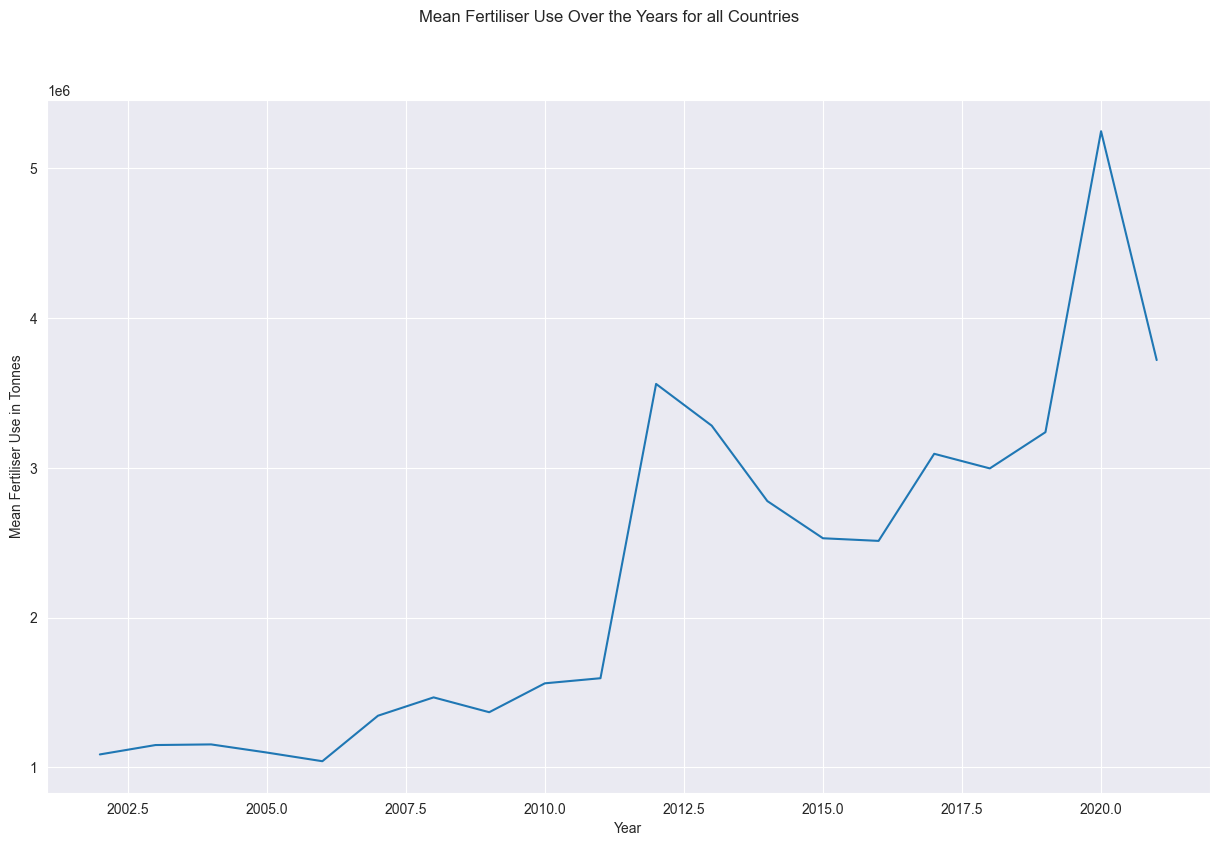

In [1516]:
# Plot the mean fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Fertiliser Use Over the Years for all Countries")

fertiliser_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Fertiliser Use in Tonnes")

plt.show()

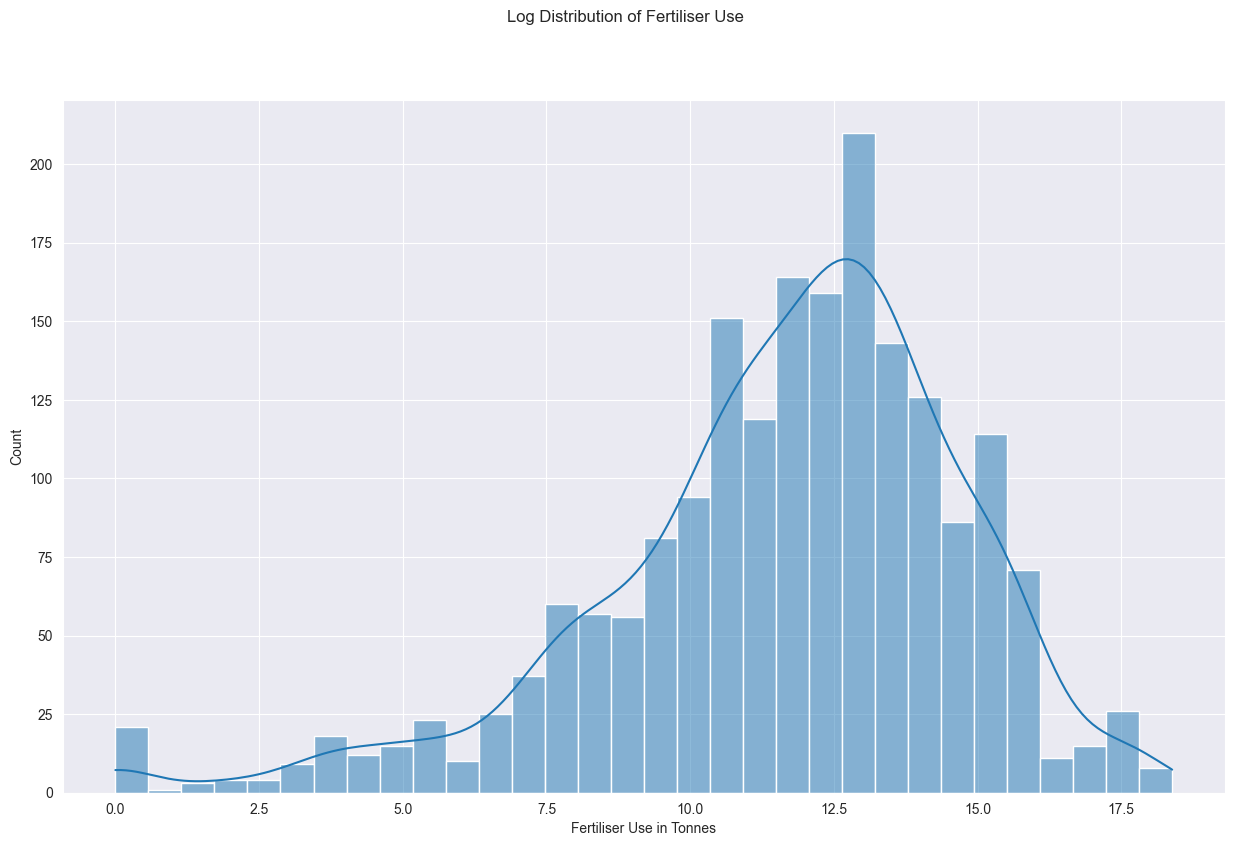

In [1517]:
# Plot the distribution of fertiliser use
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Log Distribution of Fertiliser Use")

sns.histplot(np.log1p(fertiliser_use_df['Total Fertiliser Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Fertiliser Use in Tonnes")

plt.show()

In [ ]:
# Plot the correlation between fertiliser use and export crop value
fig, ax = plt.subplots(figsize=(15,9))
temp = merged_df.groupby('Year').agg({
    'Total Fertiliser Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

plt.suptitle("Correlation between Fertiliser Use and Export Crop Value")

sns.scatterplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Fertiliser Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.3 Land Temperature Change Analysis

In this section, I will perform exploratory data analysis on the land temperature change data. I will explore the following:
- Mean land temperature change over the years for all countries
- Land temperature change distribution
- Land temperature change correlation with export crop value

In [1418]:
# Prepare the data for analysis
land_temperature_change_mean = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].mean()
land_temperature_change_total = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].sum()

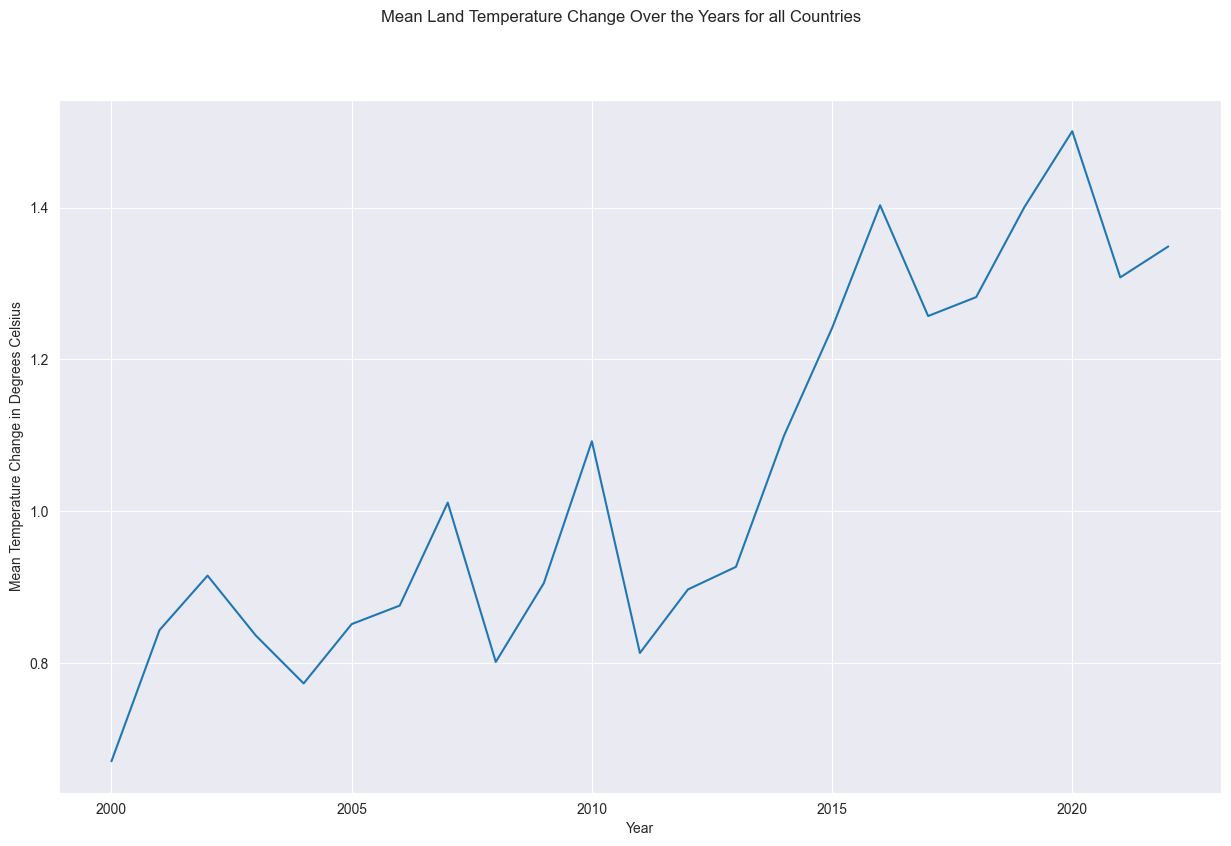

In [1419]:
# Plot the mean land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Land Temperature Change Over the Years for all Countries")

land_temperature_change_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Change in Degrees Celsius")

plt.show()

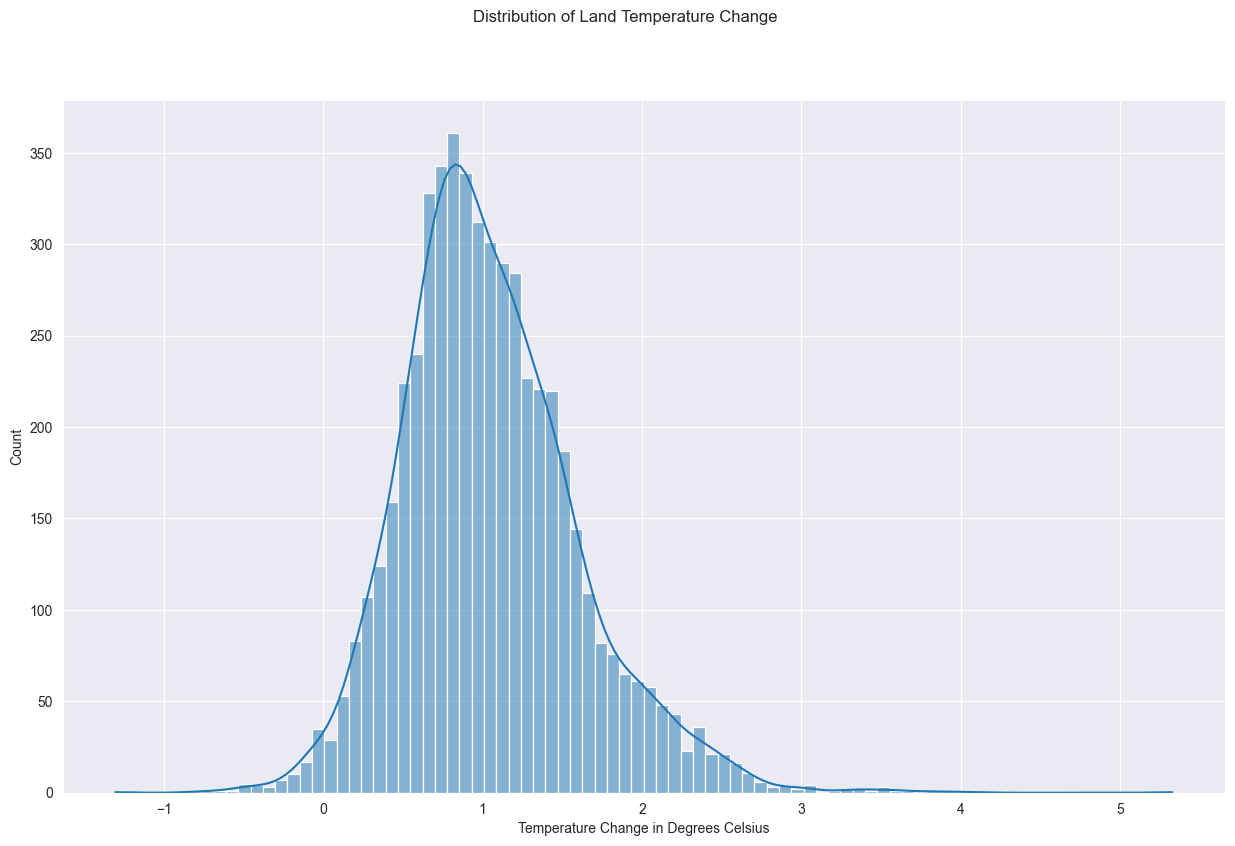

In [1420]:
# Plot the distribution of land temperature change
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Land Temperature Change")

sns.histplot(land_temperature_change_df['Temperature Change in Degrees Celsius'], kde=True, ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")

plt.show()

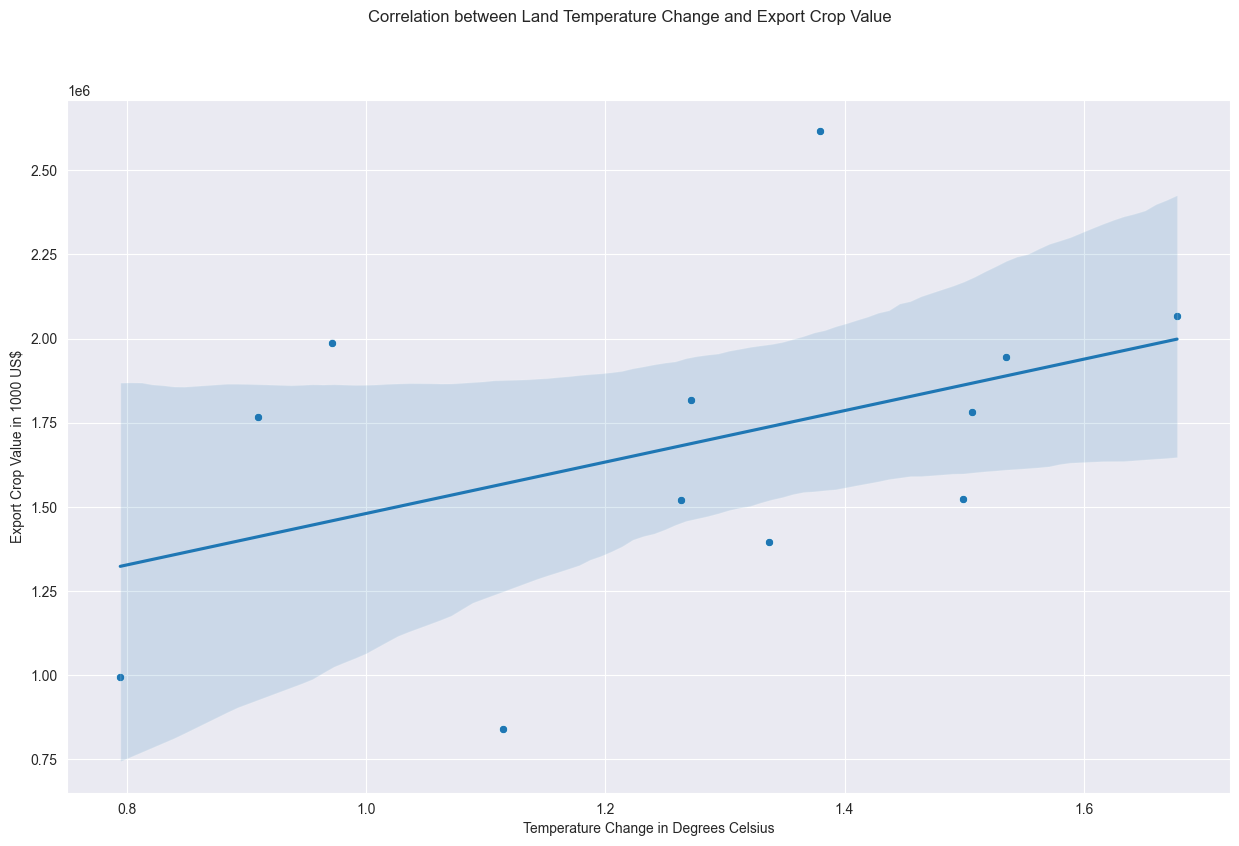

In [1421]:
# Plot the correlation between land temperature change and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Land Temperature Change and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Temperature Change in Degrees Celsius': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Temperature Change in Degrees Celsius")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.4 Pesticides Use Analysis

In this section, I will perform exploratory data analysis on the pesticides use data. I will explore the following:
- Mean pesticides use over the years for all countries
- Distribution of pesticides use
- Pesticides use correlation with crop yield

In [1422]:
# Prepare the data for analysis
pesticides_use_mean = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].mean()
pesticides_use_total = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].sum()

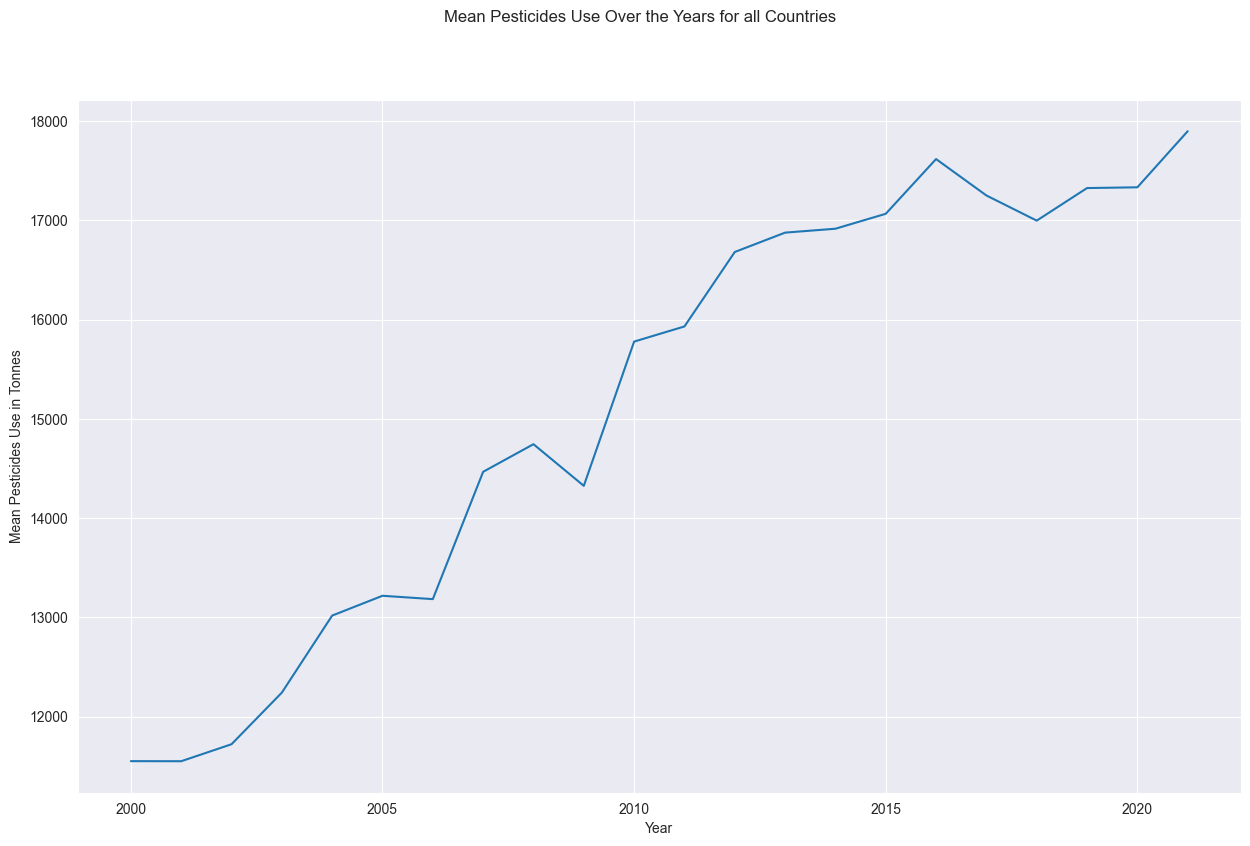

In [1423]:
# Plot the mean pesticides use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Pesticides Use Over the Years for all Countries")

pesticides_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Pesticides Use in Tonnes")

plt.show()

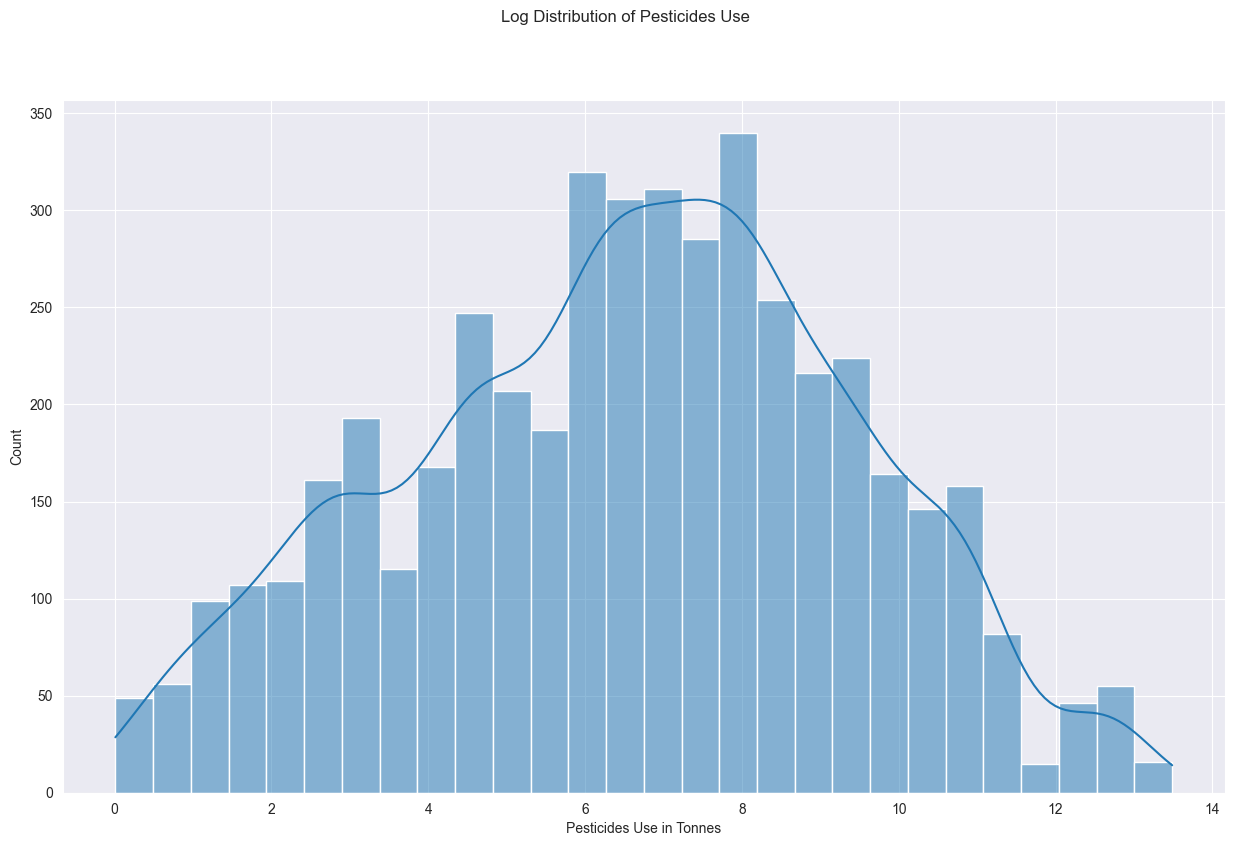

In [1424]:
# Plot the distribution of pesticides use
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Pesticides Use")

sns.histplot(np.log1p(pesticides_use_df['Total Pesticides Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Pesticides Use in Tonnes")

plt.show()

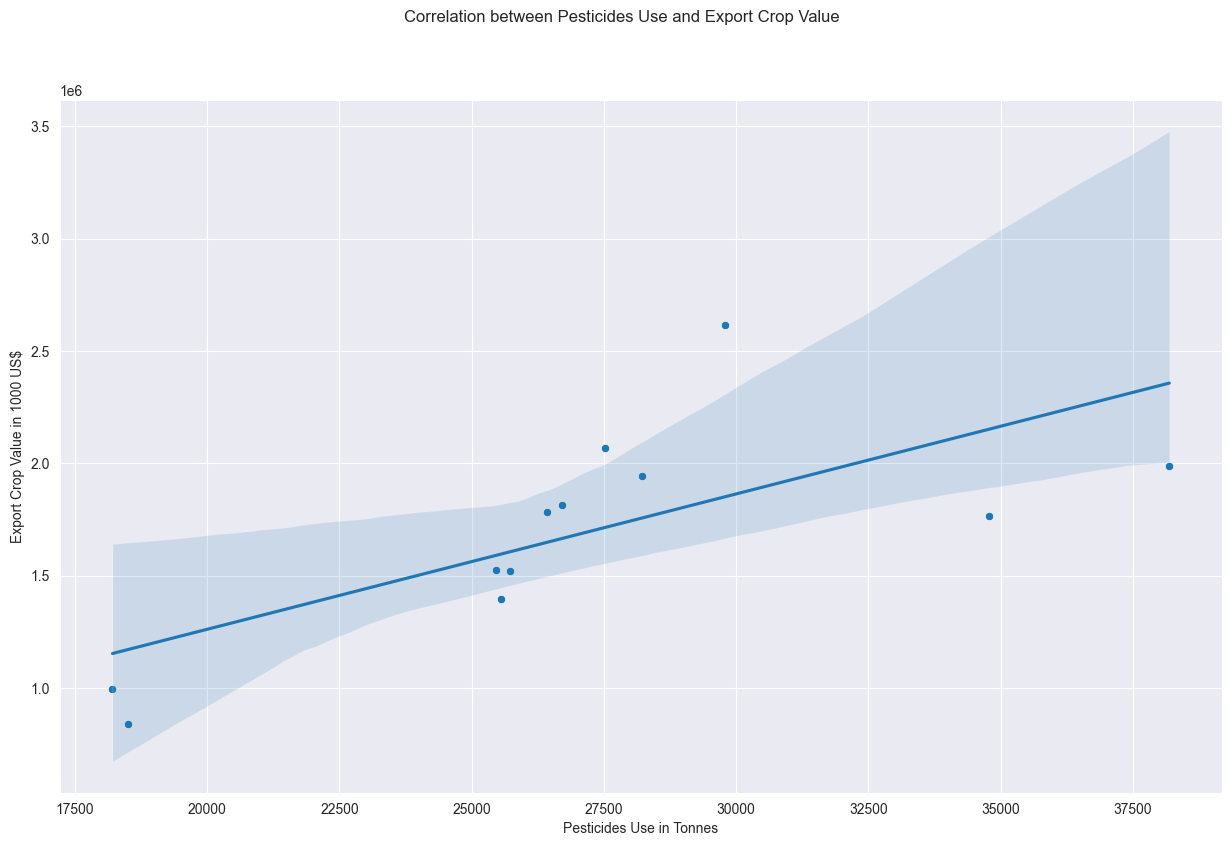

In [1425]:
# Plot the correlation between pesticides use and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Pesticides Use and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Pesticides Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Pesticides Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.5 Crop Value Analysis

In this section, I will perform exploratory data analysis on the crop value data (both import and export). I will explore the following:
- Mean crop value over the years for all countries by crop type
- Distribution of crop value (non-zero values only)
- Crop value correlation with crop yield
- Frequency of items

In [1426]:
# Prepare the data for analysis
crop_value_exports_mean = crop_value_exports_df.groupby(['Year', 'Item'])['Total Export Crop Value in 1000 US$'].mean()
crop_value_imports_mean = crop_value_imports_df.groupby(['Year', 'Item'])['Total Import Crop Value in 1000 US$'].mean()
non_zero_crop_value_exports = crop_value_exports_df[crop_value_exports_df['Total Export Crop Value in 1000 US$'] > 0]
non_zero_crop_value_imports = crop_value_imports_df[crop_value_imports_df['Total Import Crop Value in 1000 US$'] > 0]

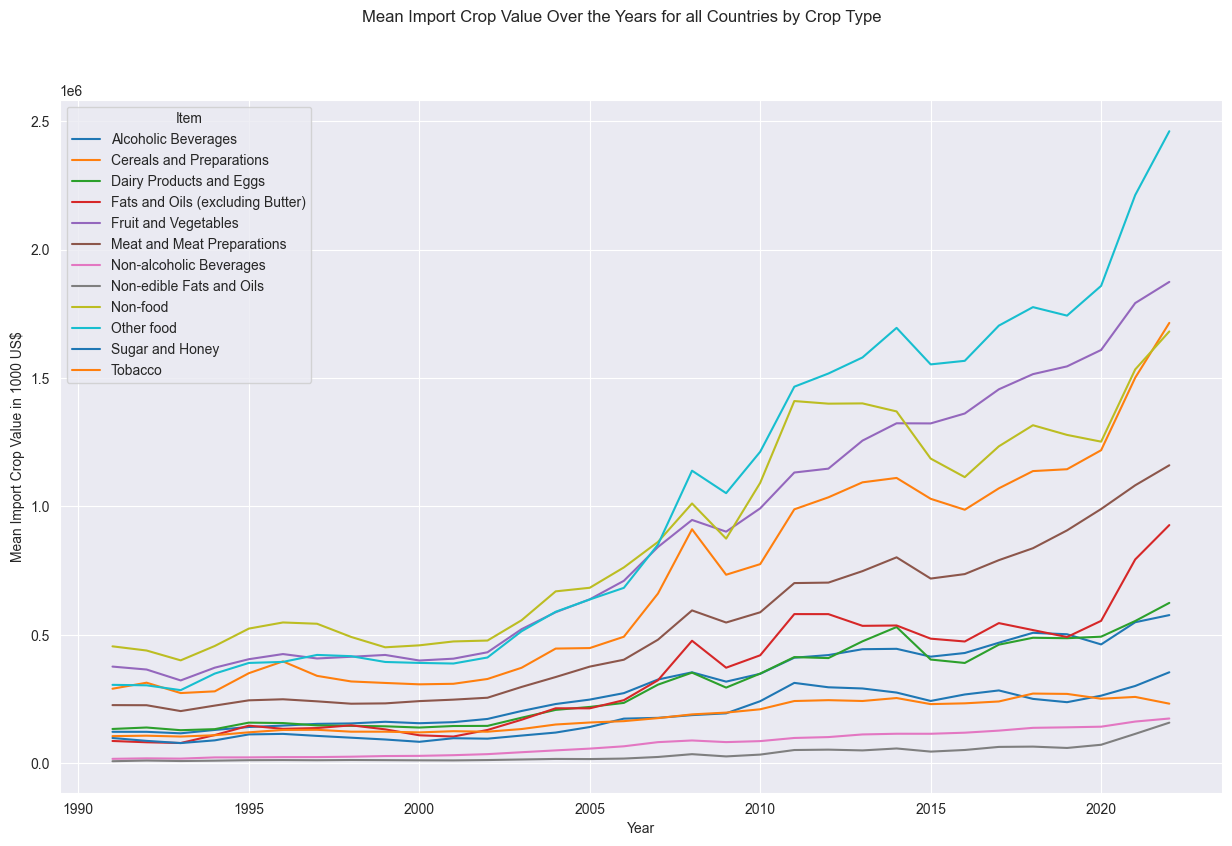

In [1427]:
# Plot the mean import crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Crop Value Over the Years for all Countries by Crop Type")

crop_value_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Crop Value in 1000 US$")
plt.show()

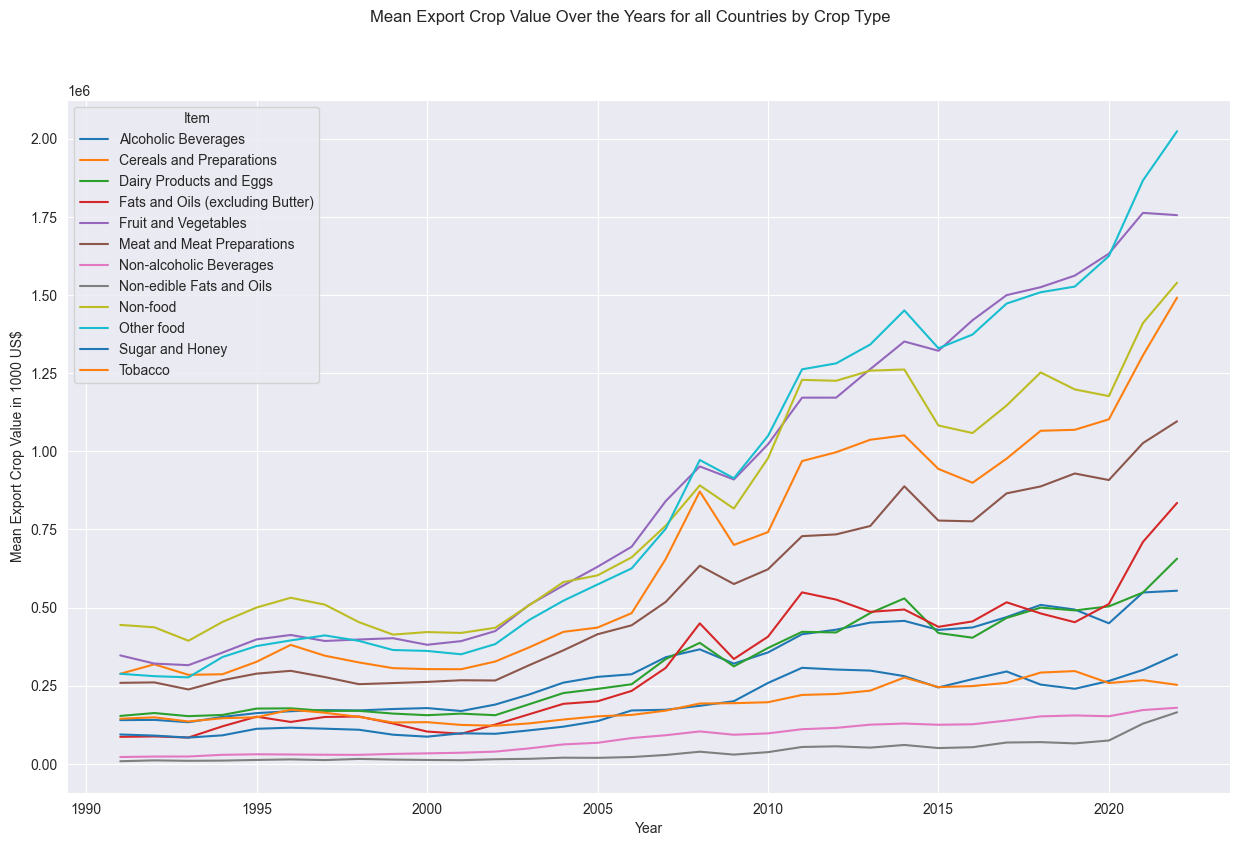

In [1428]:
# Plot the mean export crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Crop Value Over the Years for all Countries by Crop Type")

crop_value_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Crop Value in 1000 US$")
plt.show()

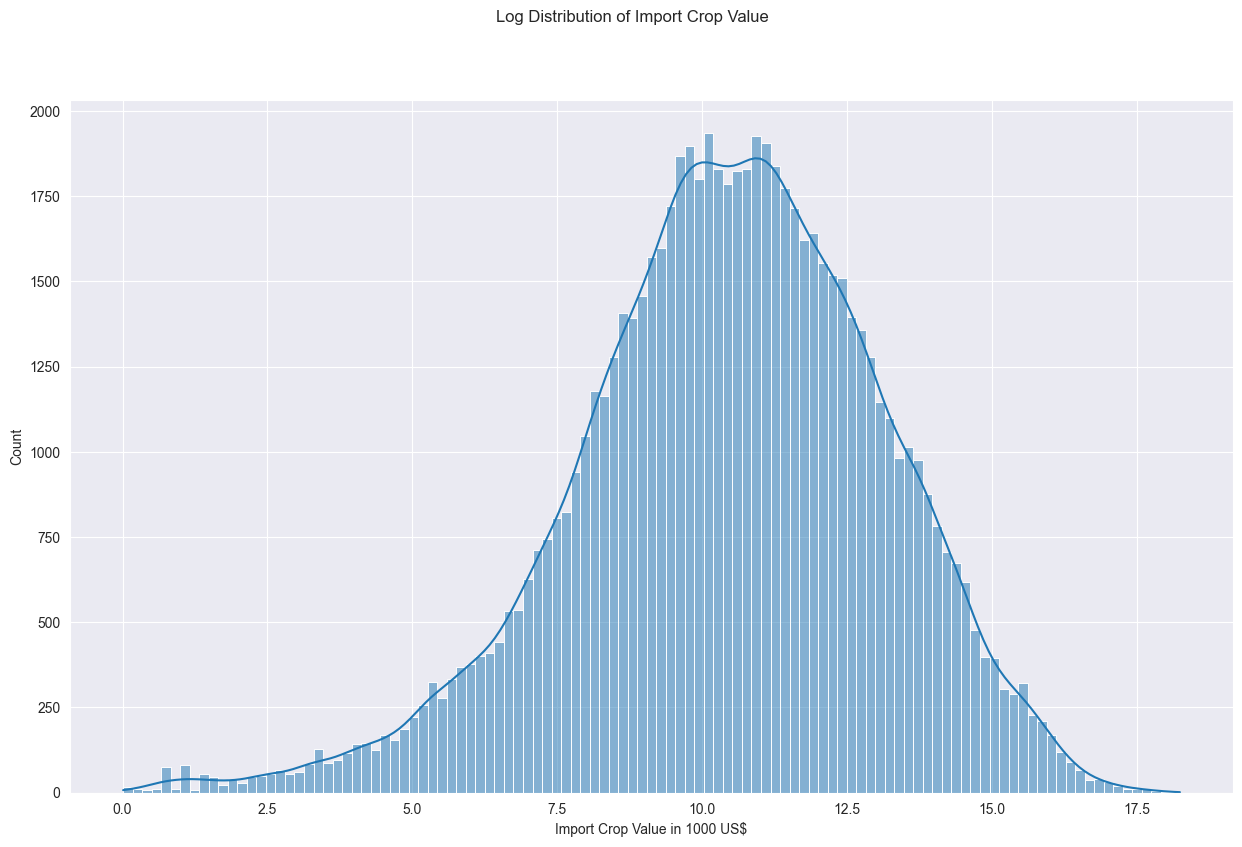

In [1429]:
# Plot the log1p distribution of import crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Import Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_imports['Total Import Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.show()

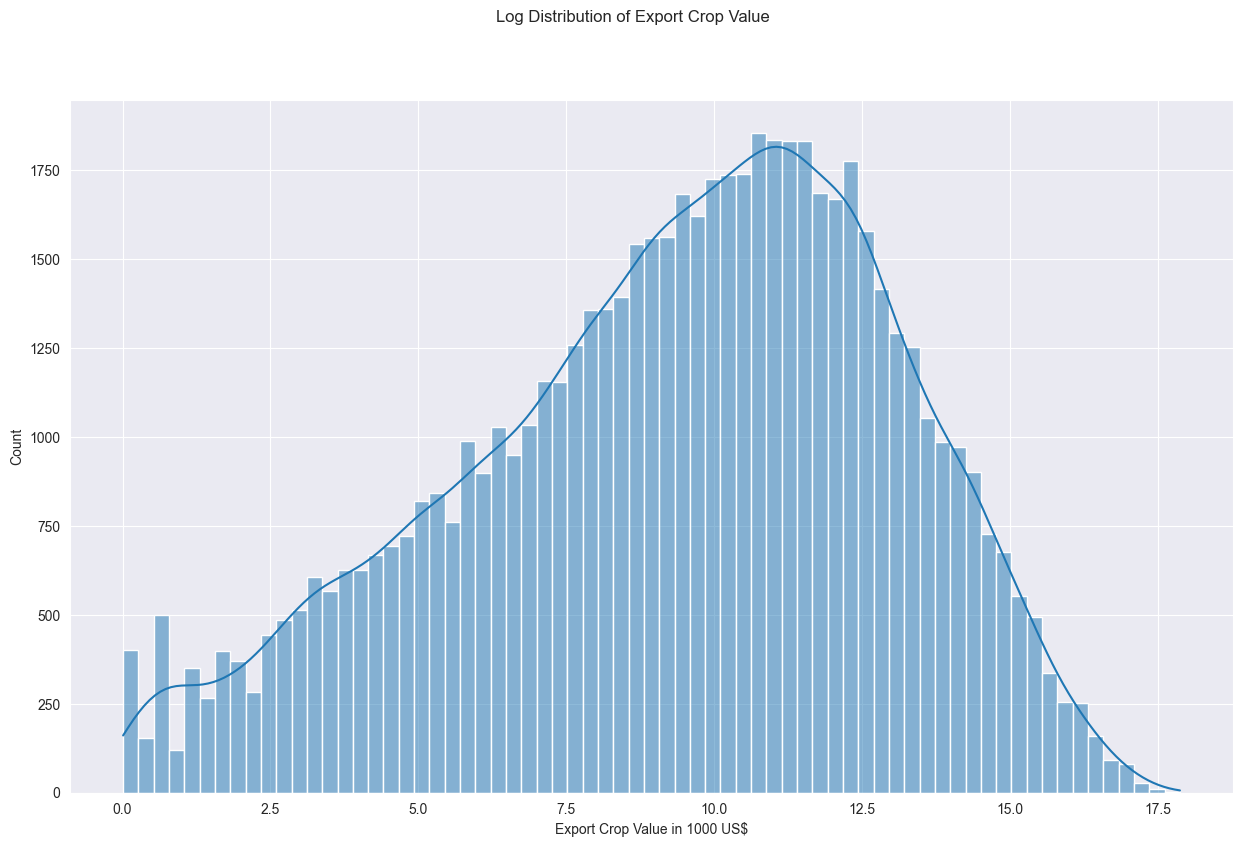

In [1430]:
# Plot the log1p distribution of export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Export Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_exports['Total Export Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.show()

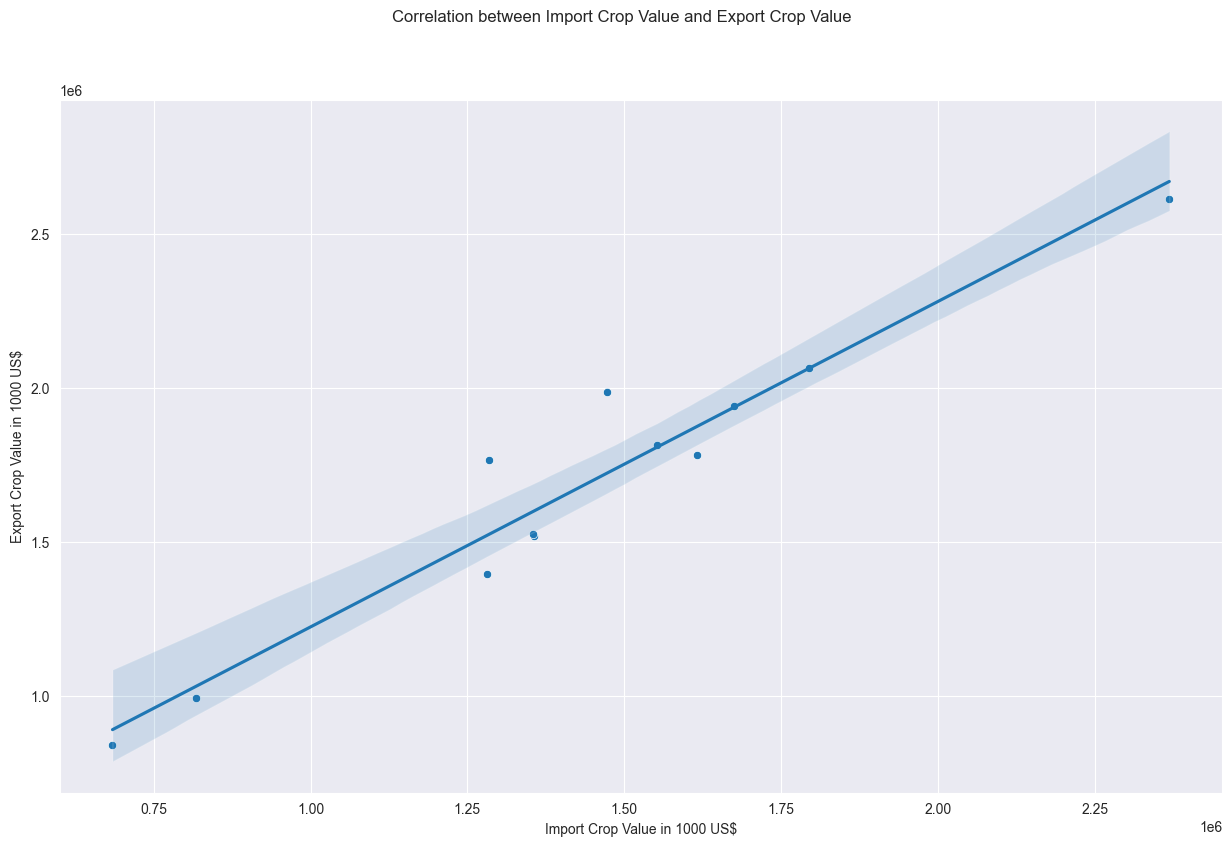

In [1431]:
# Plot the correlation between import crop value and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Crop Value and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Import Crop Value in 1000 US$': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Import Crop Value in 1000 US$")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_15848\3302092372.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')


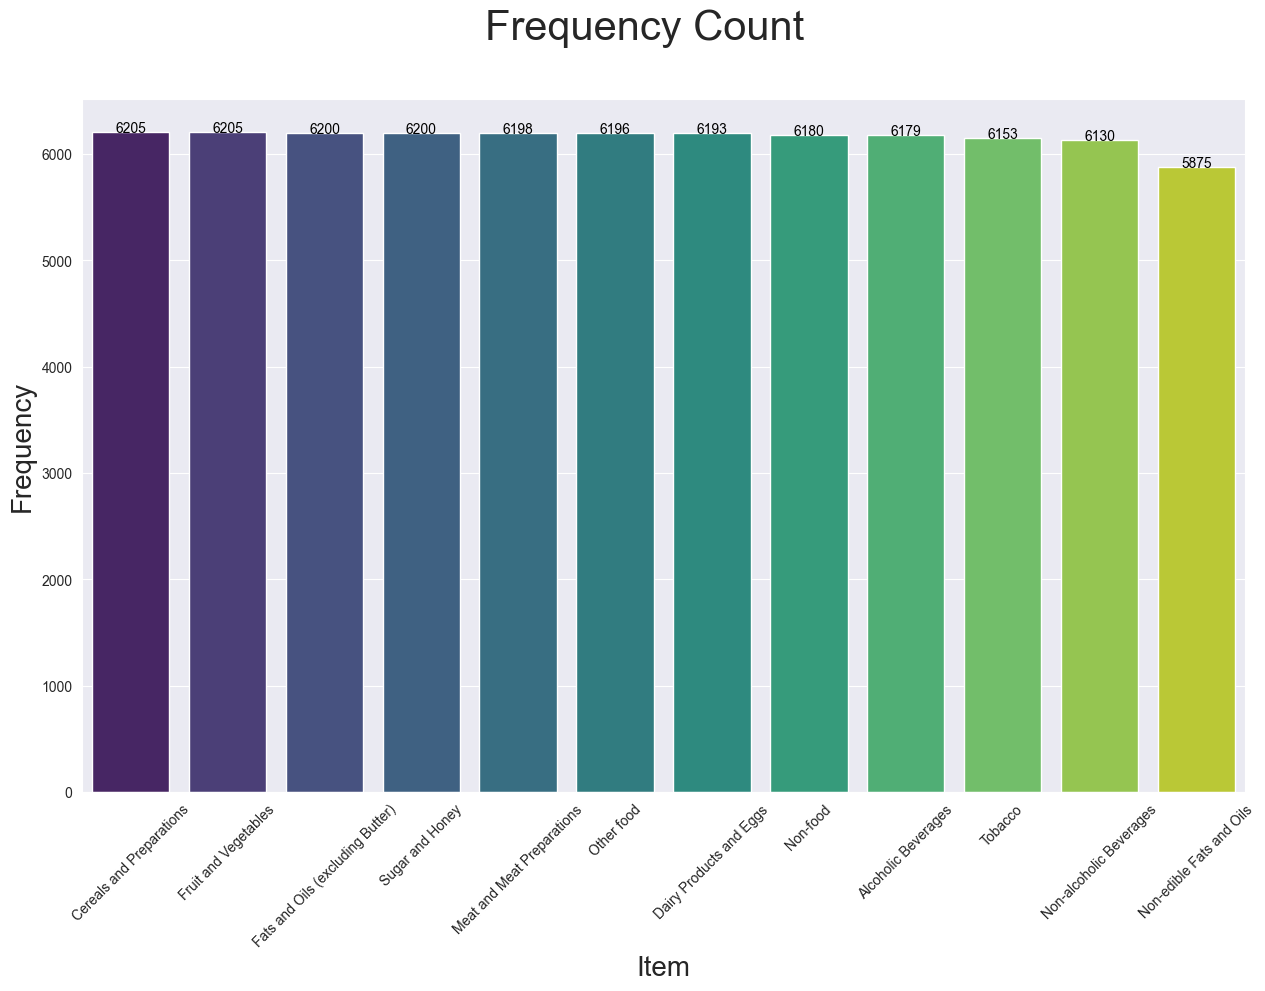

In [1432]:
# Count the values and reset the index
temp = crop_value_imports_df['Item'].value_counts().reset_index()
temp.columns = ['Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_15848\2522072290.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')


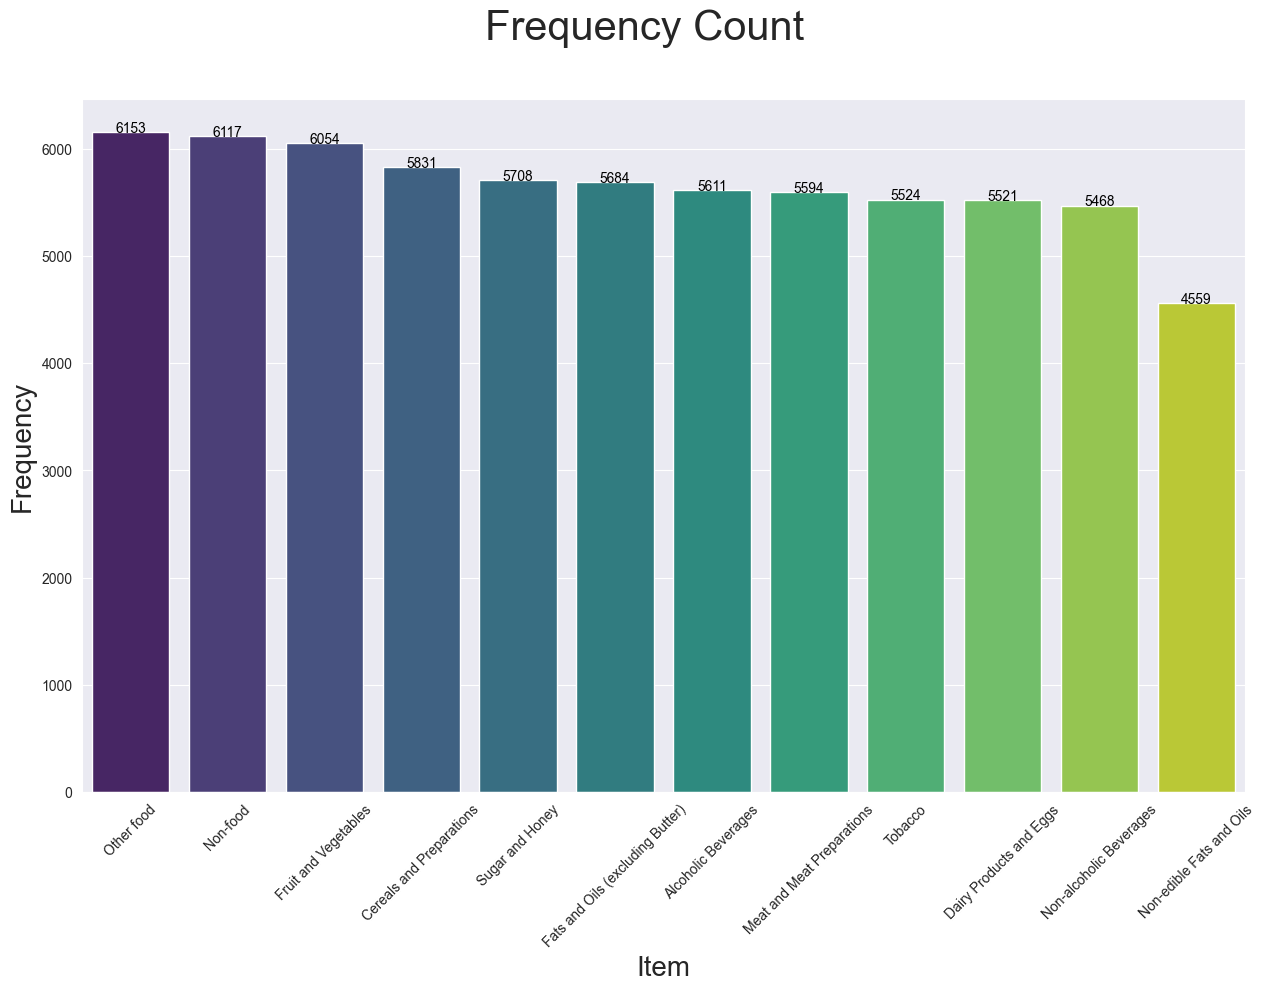

In [1433]:
# Count the values and reset the index
temp = crop_value_exports_df['Item'].value_counts().reset_index()
temp.columns = ['Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.6 Land Use Analysis

In this section, I will perform exploratory data analysis on the land use data. I will explore the following:
- Mean agricultural land over the years for all countries
- Total agricultural land over the years for all countries
- Agricultural land distribution
- Agricultural land correlation with crop yield

In [1434]:
# Prepare the data for analysis
land_use_mean = land_use_df.groupby('Year')['Agricultural Land in Hectares'].mean()
land_use_total = land_use_df.groupby('Year')['Agricultural Land in Hectares'].sum()
non_zero_land_use = land_use_df[land_use_df['Agricultural Land in Hectares'] > 0]

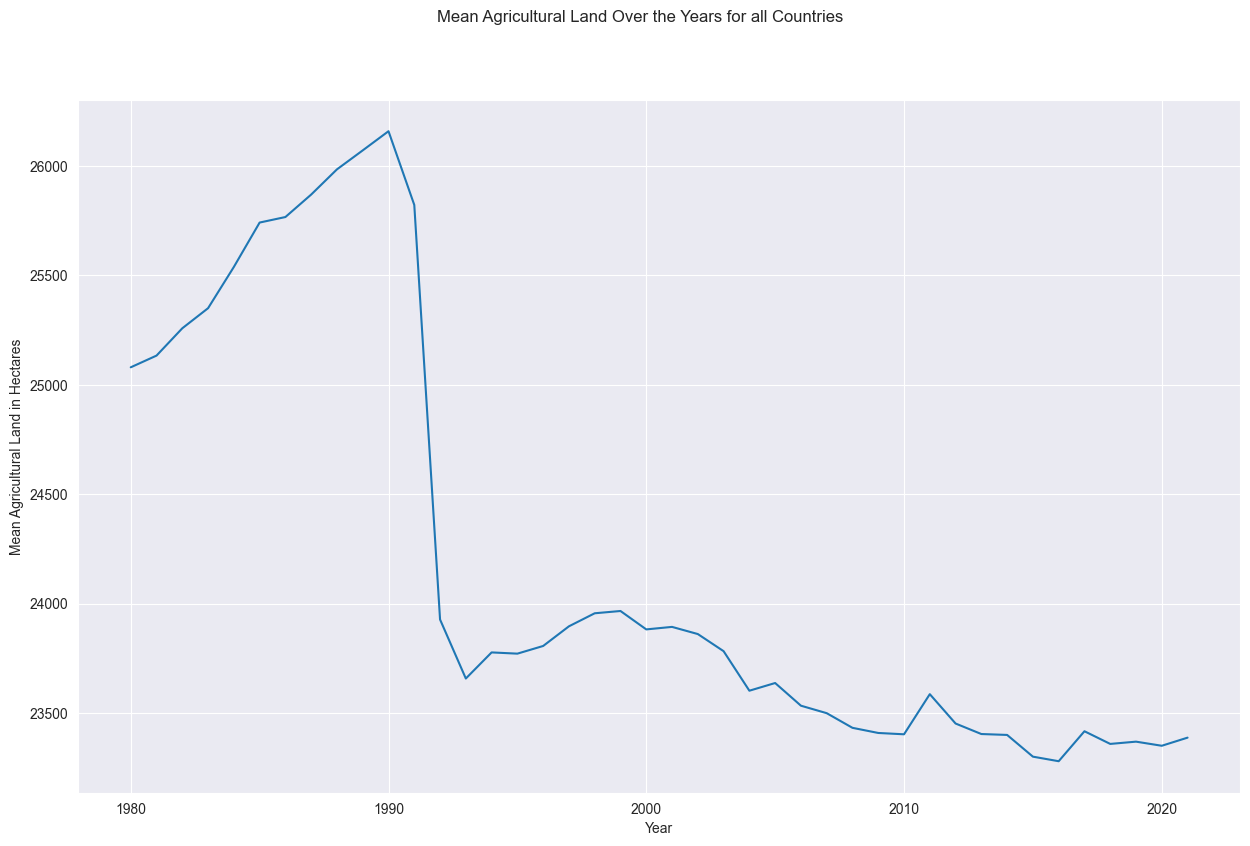

In [1435]:
# Plot the mean agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Agricultural Land Over the Years for all Countries")

land_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Agricultural Land in Hectares")
plt.show()

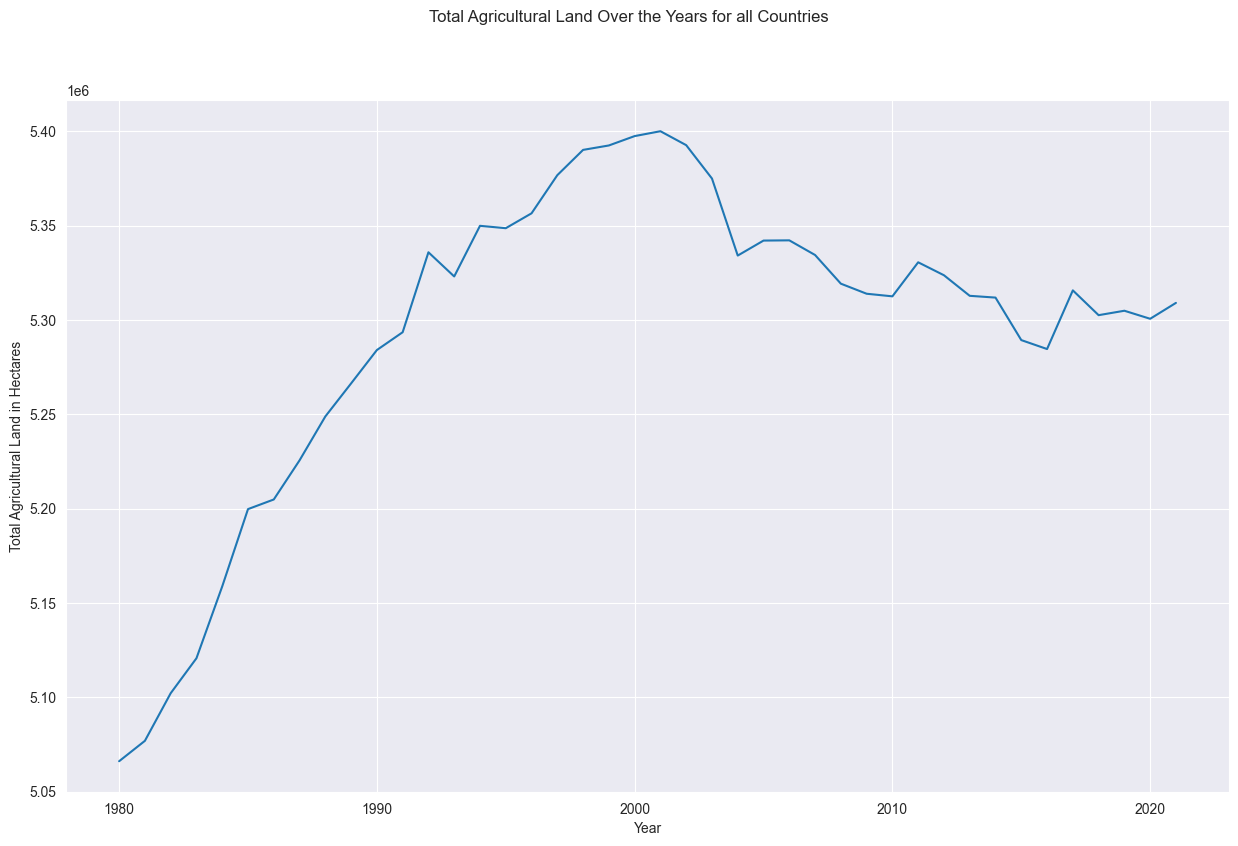

In [1436]:
# Plot the total agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Total Agricultural Land Over the Years for all Countries")

land_use_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Agricultural Land in Hectares")
plt.show()

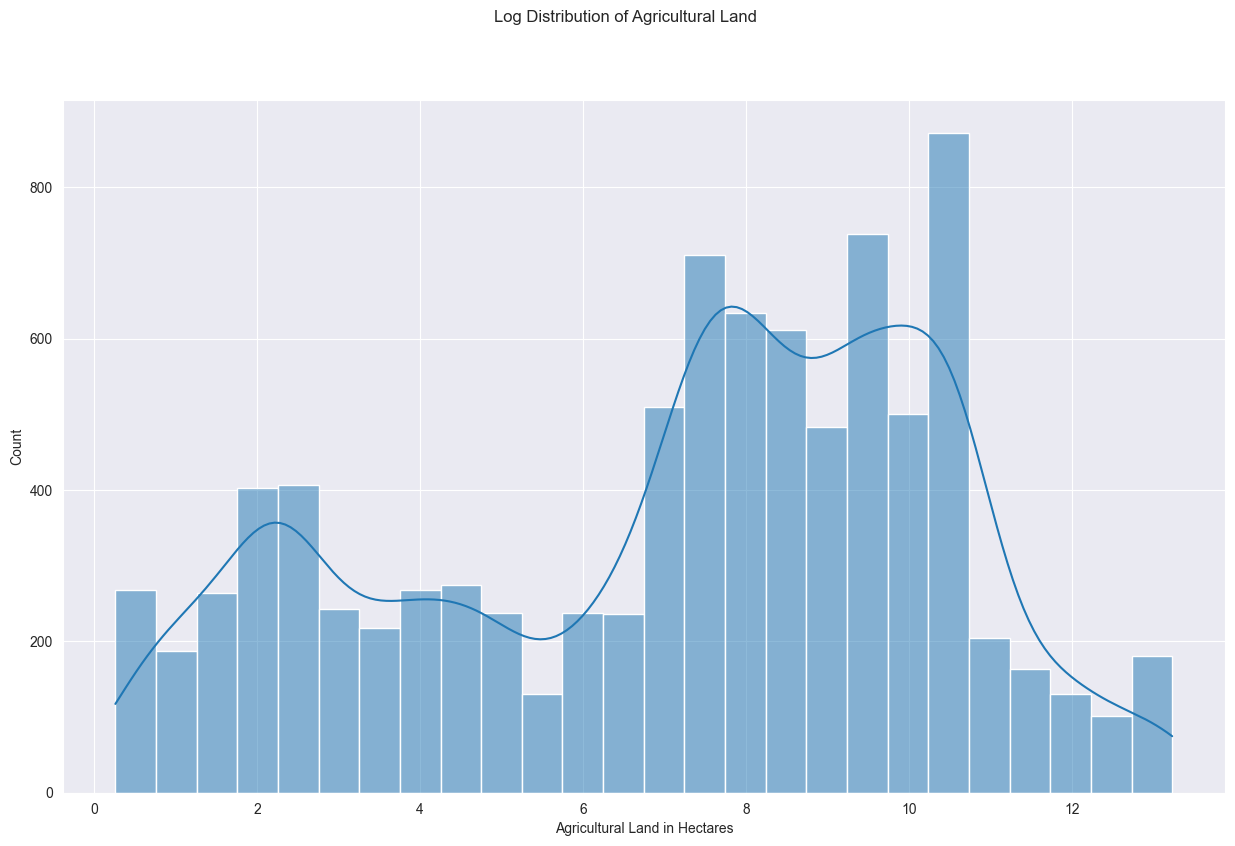

In [1437]:
# Plot the distribution of agricultural land
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Agricultural Land")

sns.histplot(np.log1p(non_zero_land_use['Agricultural Land in Hectares']), kde=True, ax=ax)
plt.xlabel("Agricultural Land in Hectares")
plt.show()

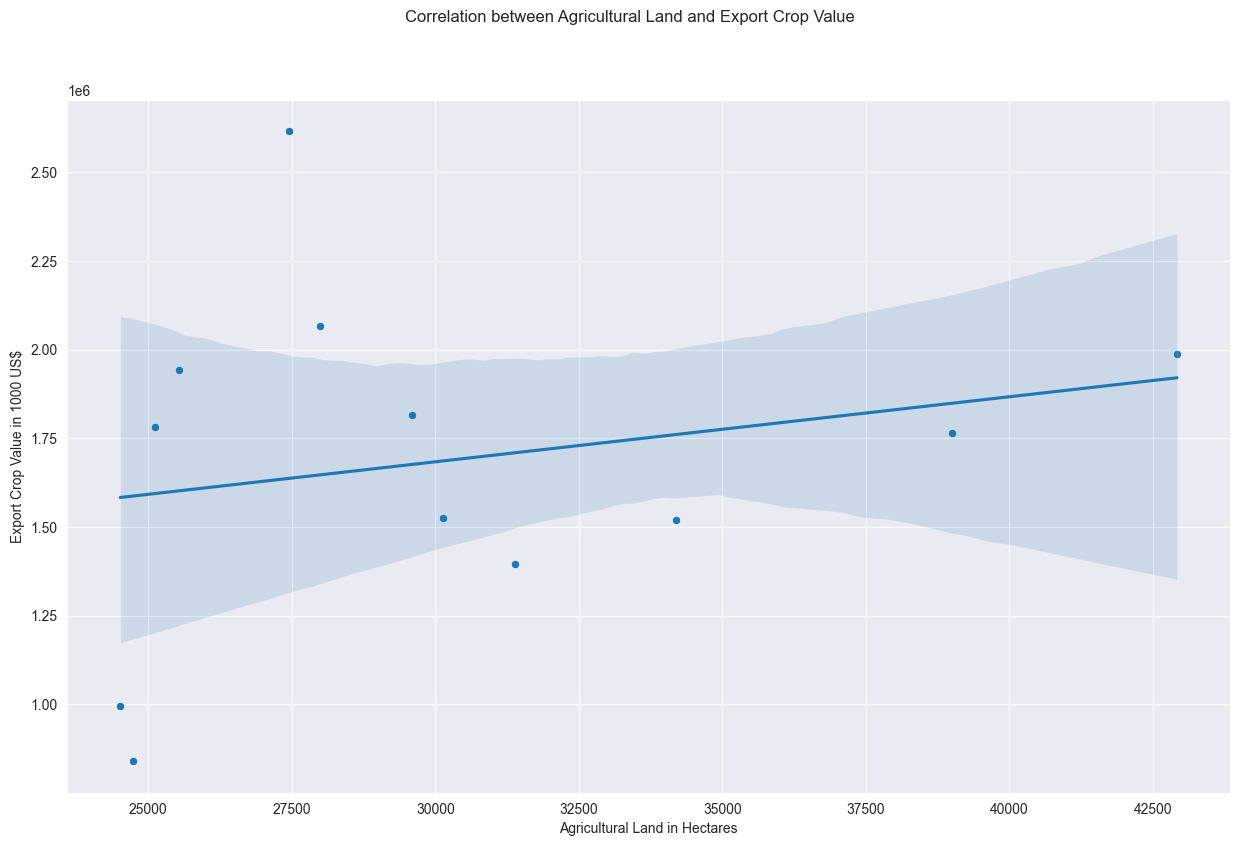

In [1438]:
# Plot the correlation between agricultural land and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Agricultural Land and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Agricultural Land in Hectares': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Agricultural Land in Hectares")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.7 Food Balances Analysis

In this section, I will perform exploratory data analysis on the food balances data. I will explore the following:
- Mean import and export quantity over the years for all countries by crop type
- Distribution of import and export quantity
- Import and export quantity correlation with export crop value
- Frequency of items

In [1439]:
# Prepare the data for analysis
food_balances_imports_mean = food_balances_imports_df.groupby(['Year', 'Item'])['Total Import Quantity in Tonnes'].mean()
food_balances_exports_mean = food_balances_exports_df.groupby(['Year', 'Item'])['Total Export Quantity in Tonnes'].mean()
non_zero_food_balances_imports = food_balances_imports_df[food_balances_imports_df['Total Import Quantity in Tonnes'] > 0]
non_zero_food_balances_exports = food_balances_exports_df[food_balances_exports_df['Total Export Quantity in Tonnes'] > 0]

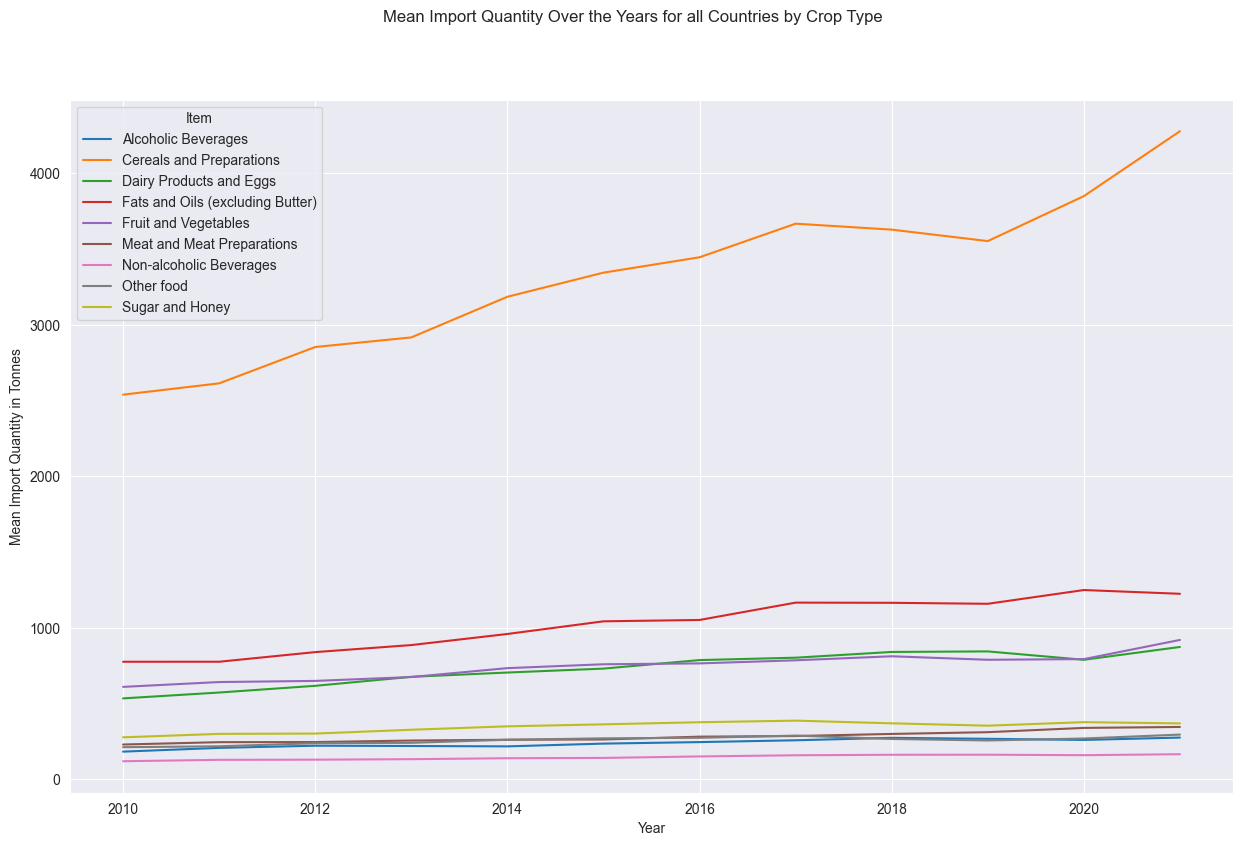

In [1440]:
# Plot the mean import quantity over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Quantity Over the Years for all Countries by Crop Type")

food_balances_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Quantity in Tonnes")
plt.show()

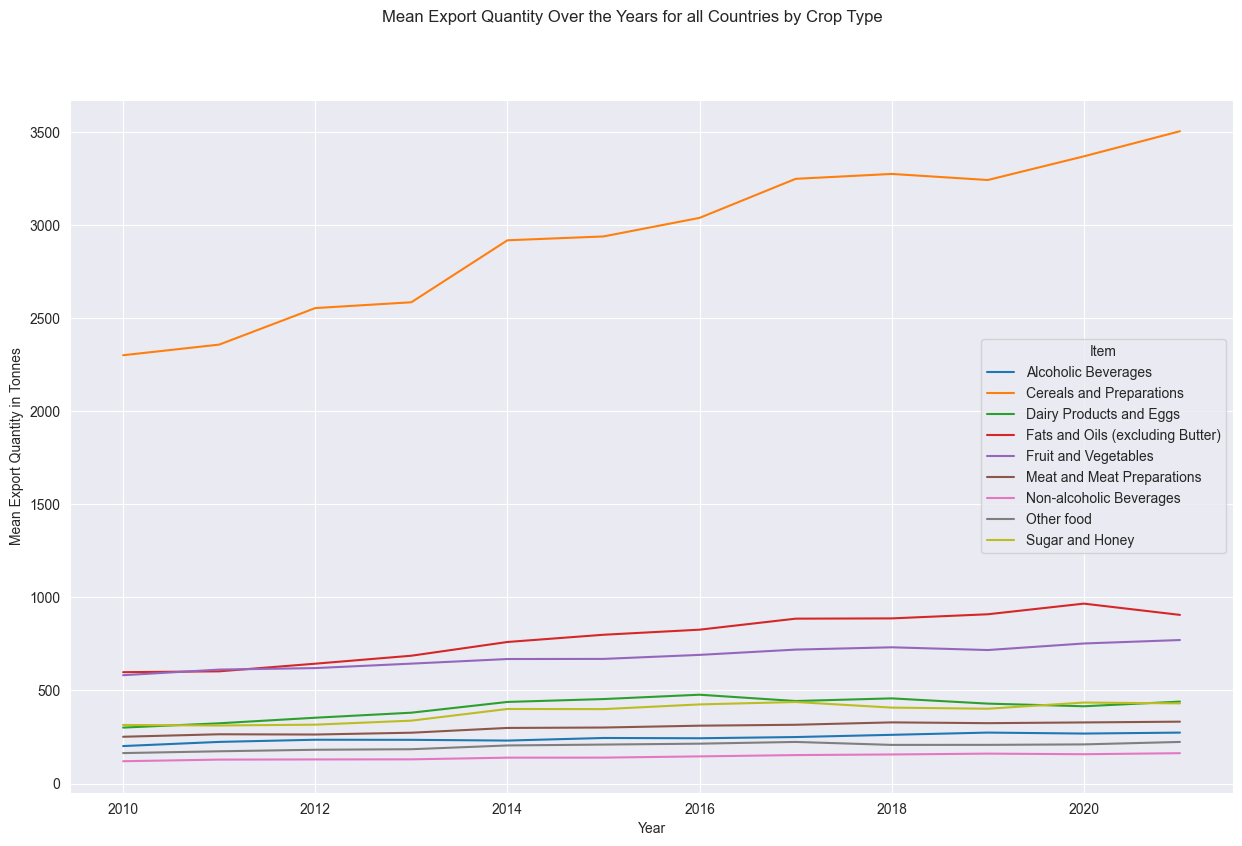

In [1441]:
# Plot the mean export quantity over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Quantity Over the Years for all Countries by Crop Type")

food_balances_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Quantity in Tonnes")
plt.show()

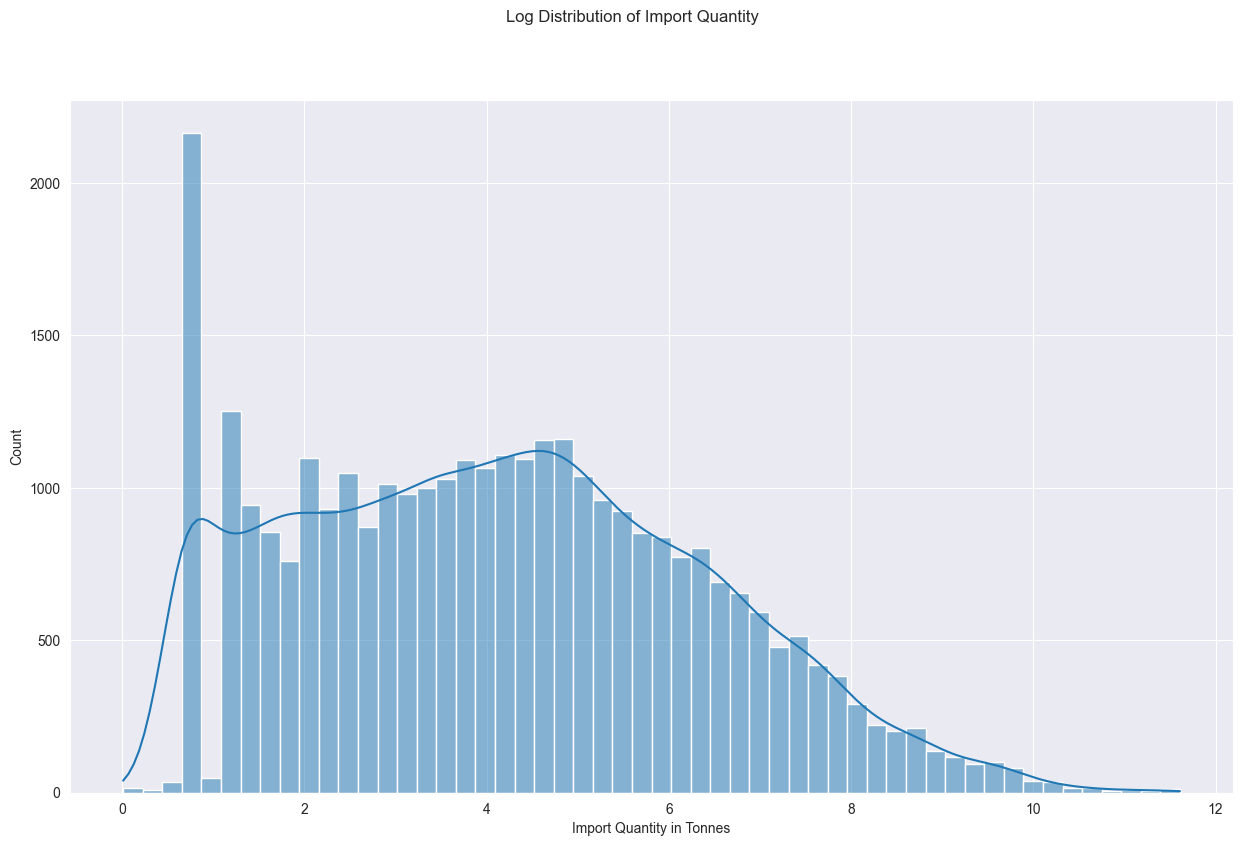

In [1442]:
# Plot the log1p distribution of import quantity
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Import Quantity")

sns.histplot(np.log1p(non_zero_food_balances_imports['Total Import Quantity in Tonnes']), kde=True, ax=ax)
plt.xlabel("Import Quantity in Tonnes")
plt.show()

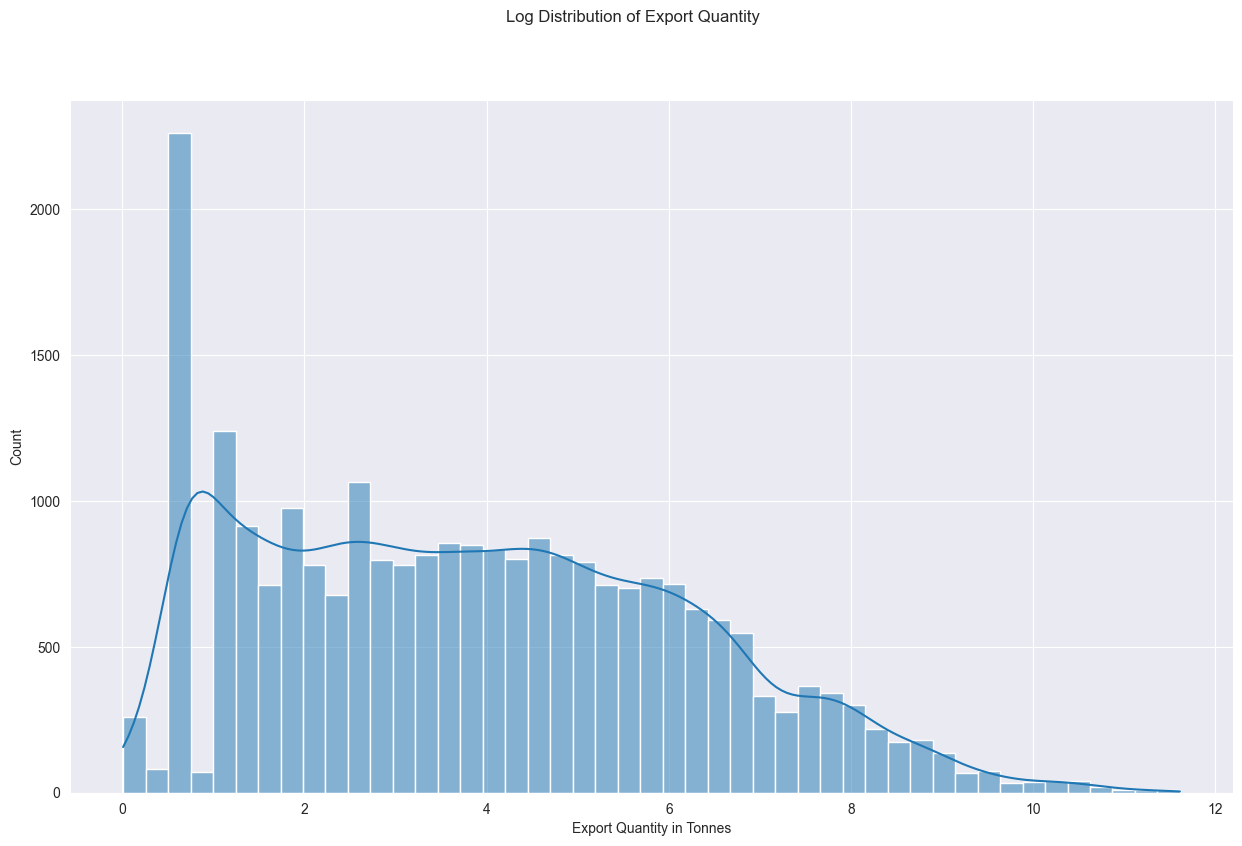

In [1443]:
# Plot the log1p distribution of export quantity
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Export Quantity")

sns.histplot(np.log1p(non_zero_food_balances_exports['Total Export Quantity in Tonnes']), kde=True, ax=ax)
plt.xlabel("Export Quantity in Tonnes")
plt.show()

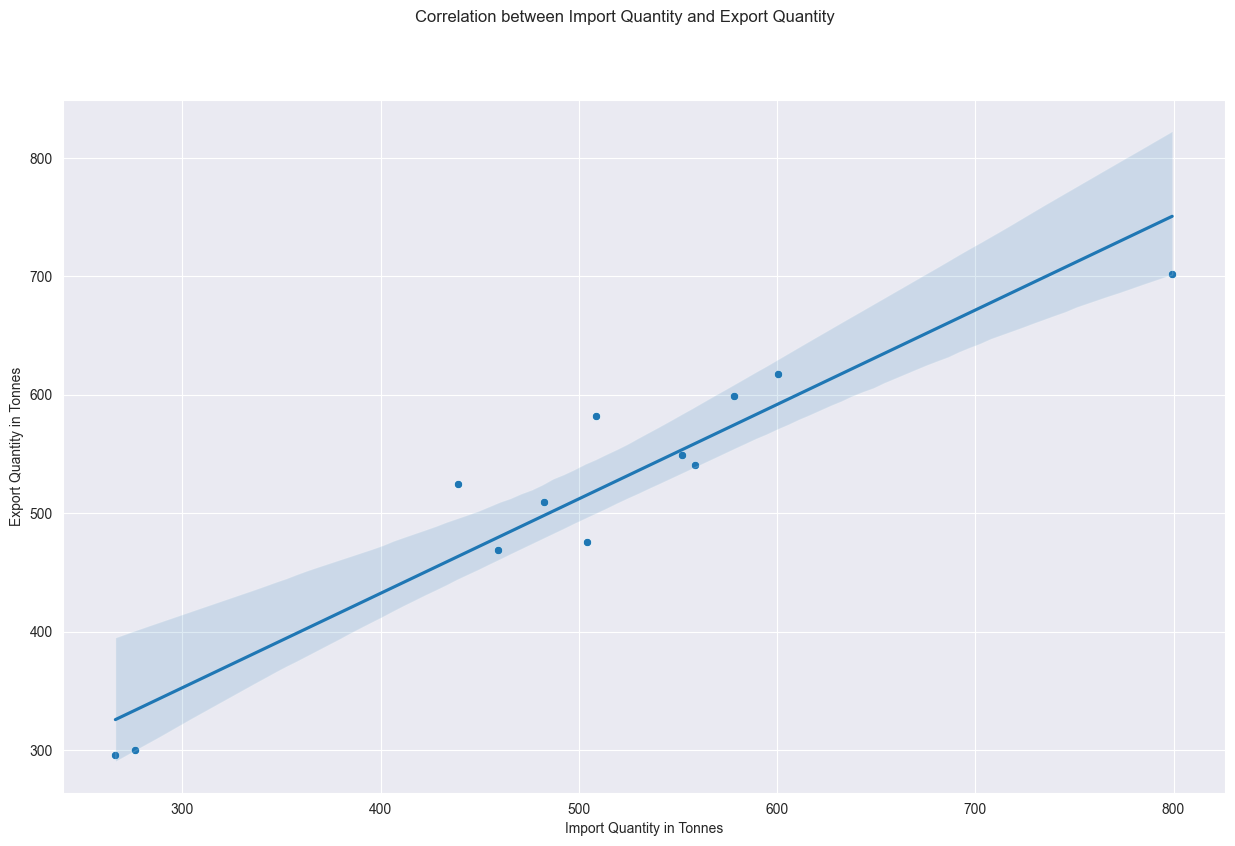

In [1444]:
# Plot the correlation between import quantity and export quantity
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Quantity and Export Quantity")

temp = merged_df.groupby('Year').agg({
    'Total Import Quantity in Tonnes': 'mean',
    'Total Export Quantity in Tonnes': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Import Quantity in Tonnes', y='Total Export Quantity in Tonnes', ax=ax)
sns.regplot(data=temp, x='Total Import Quantity in Tonnes', y='Total Export Quantity in Tonnes', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Import Quantity in Tonnes")
plt.ylabel("Export Quantity in Tonnes")
plt.show()

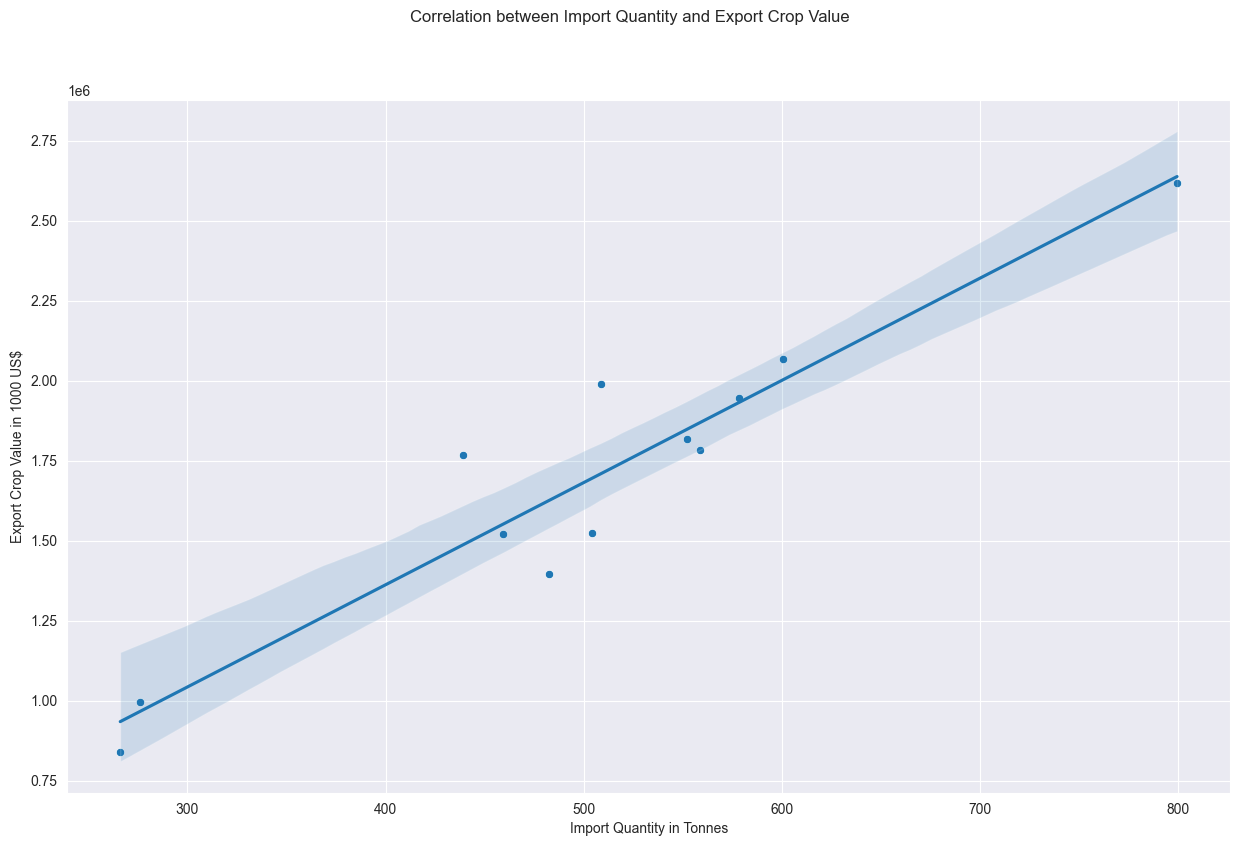

In [1445]:
# Plot the correlation between import quantity and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Quantity and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Import Quantity in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Import Quantity in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Import Quantity in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Import Quantity in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

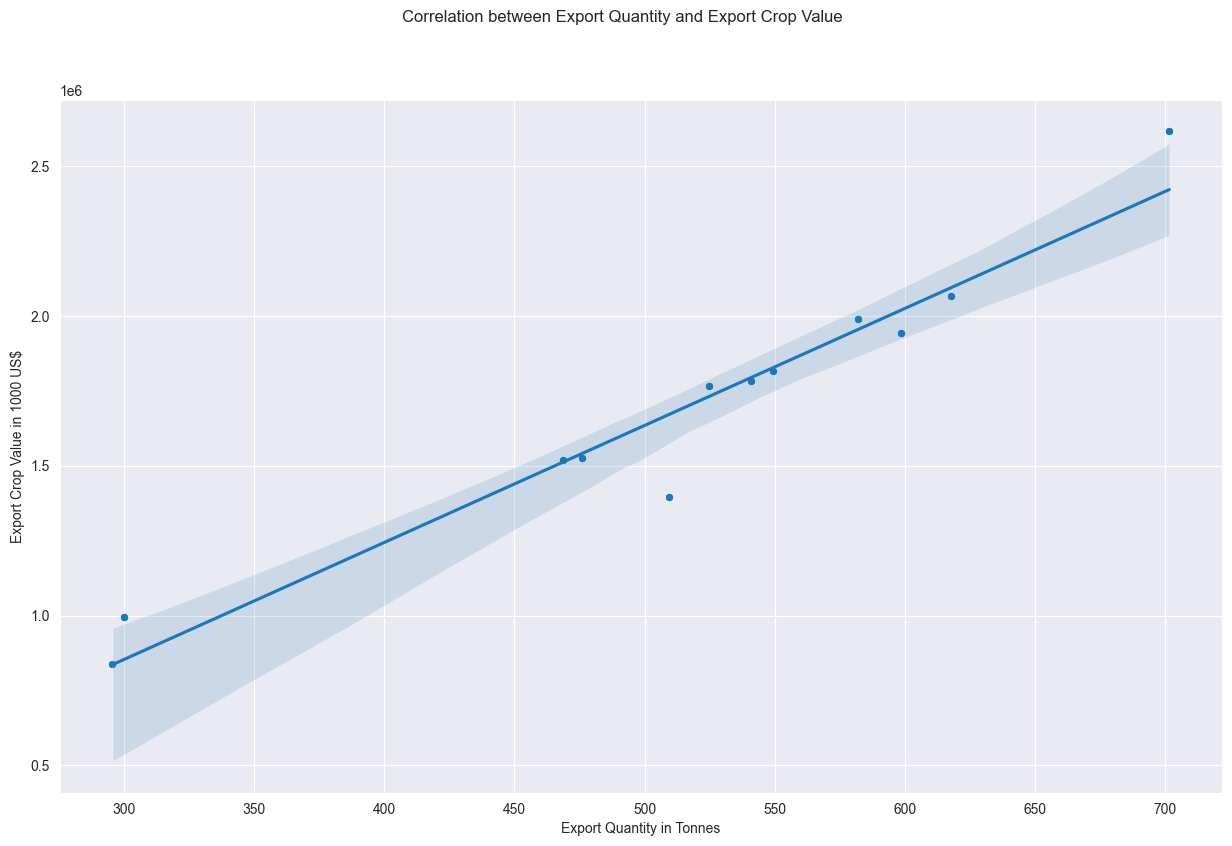

In [1446]:
# Plot the correlation between export quantity and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Export Quantity and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Export Quantity in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Export Quantity in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Export Quantity in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Export Quantity in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_15848\3931330717.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')


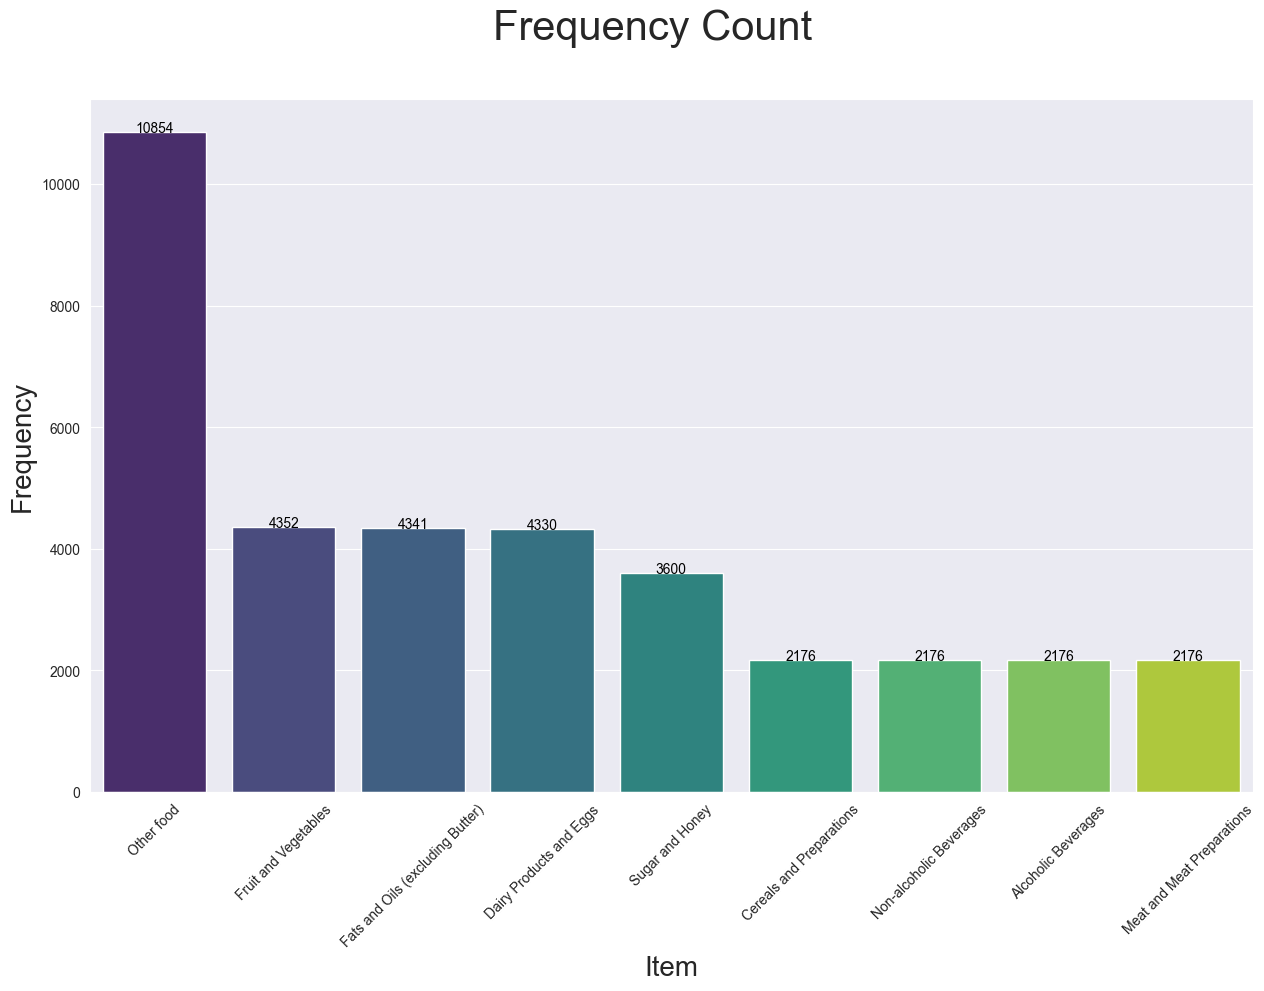

In [1447]:
# Plot frequency of items
# Count the values and reset the index
temp = food_balances_imports_df['Item'].value_counts().reset_index()
temp.columns = ['Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")
    
plt.xlabel('Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.8 Exchange Rate Analysis

In this section, I will perform exploratory data analysis on the exchange rate data. I will explore the following:
- Mean exchange rate over the years for all countries
- Exchange rate distribution
- Exchange rate correlation with export crop value

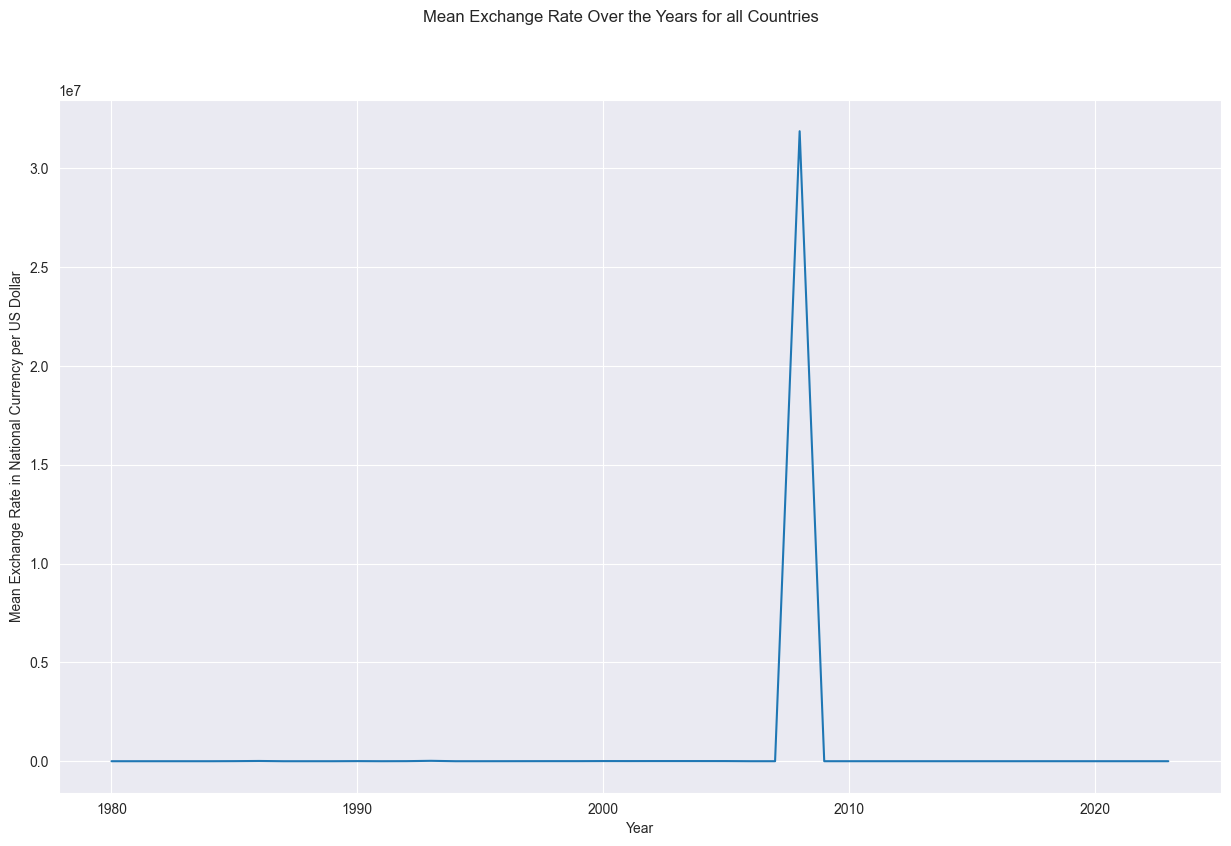

In [1448]:
# Prepare the data for analysis
exchange_rate_mean = exchange_rate_df.groupby('Year')['Exchange Rate in National Currency per US Dollar'].mean()

# Plot the mean exchange rate over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Exchange Rate Over the Years for all Countries")

exchange_rate_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Exchange Rate in National Currency per US Dollar")

plt.show()

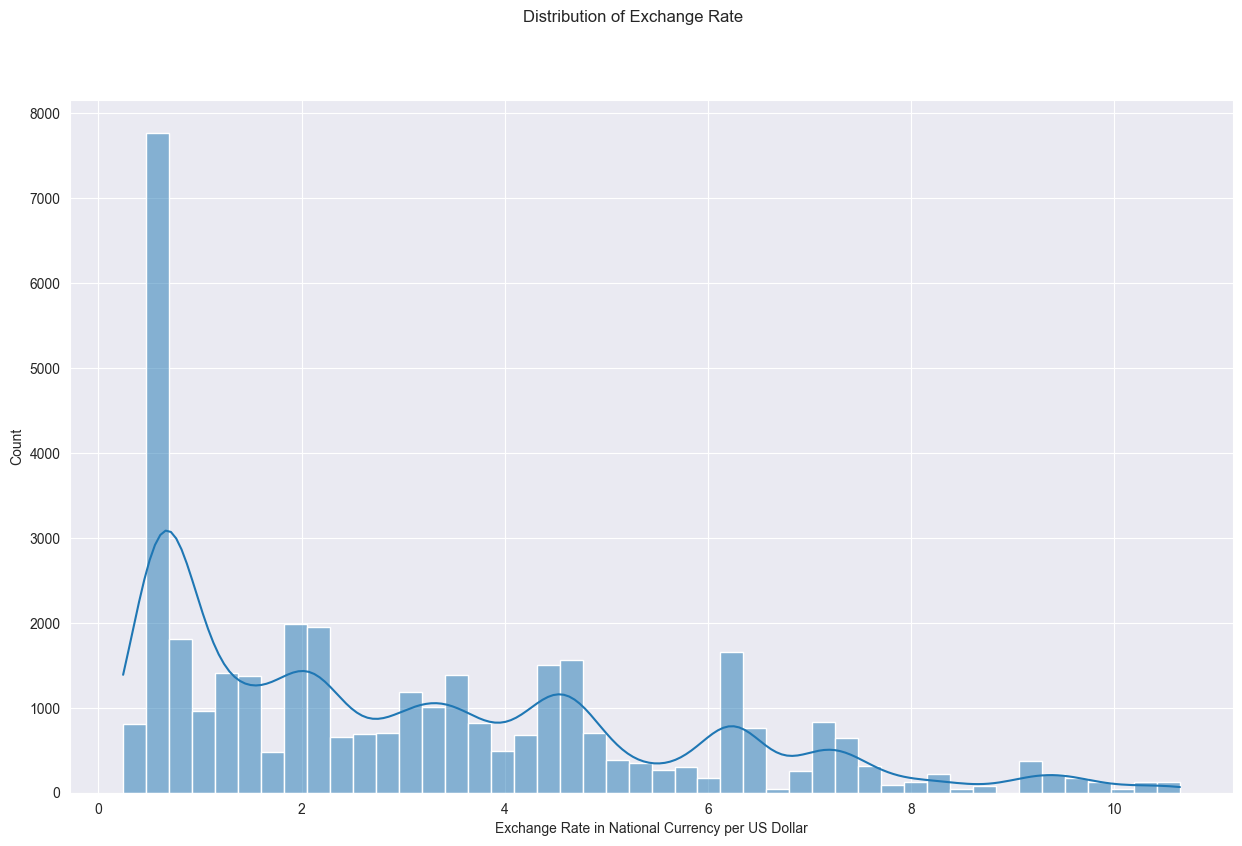

In [1449]:
# Plot the distribution of exchange rate
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Distribution of Exchange Rate")

sns.histplot(np.log1p(merged_df['Exchange Rate in National Currency per US Dollar']), kde=True, ax=ax)

plt.xlabel("Exchange Rate in National Currency per US Dollar")
plt.show()

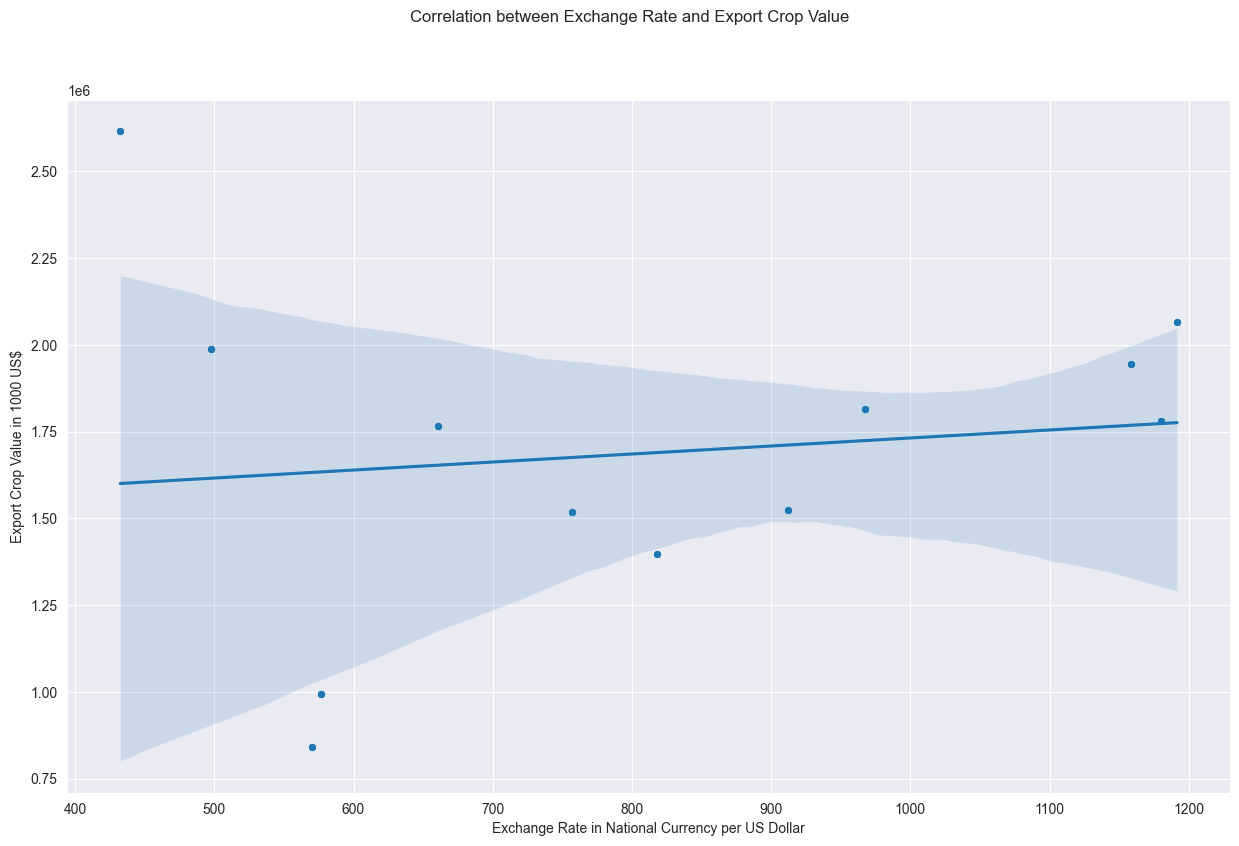

In [1450]:
# Plot the correlation between exchange rate and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Exchange Rate and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Exchange Rate in National Currency per US Dollar': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Exchange Rate in National Currency per US Dollar', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Exchange Rate in National Currency per US Dollar', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Exchange Rate in National Currency per US Dollar")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.7 Merged Data Analysis

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Frequency of items
- Correlation analysis

### 4.7.1 Frequency of Items

C:\Users\tomna\AppData\Local\Temp\ipykernel_15848\4141444619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')


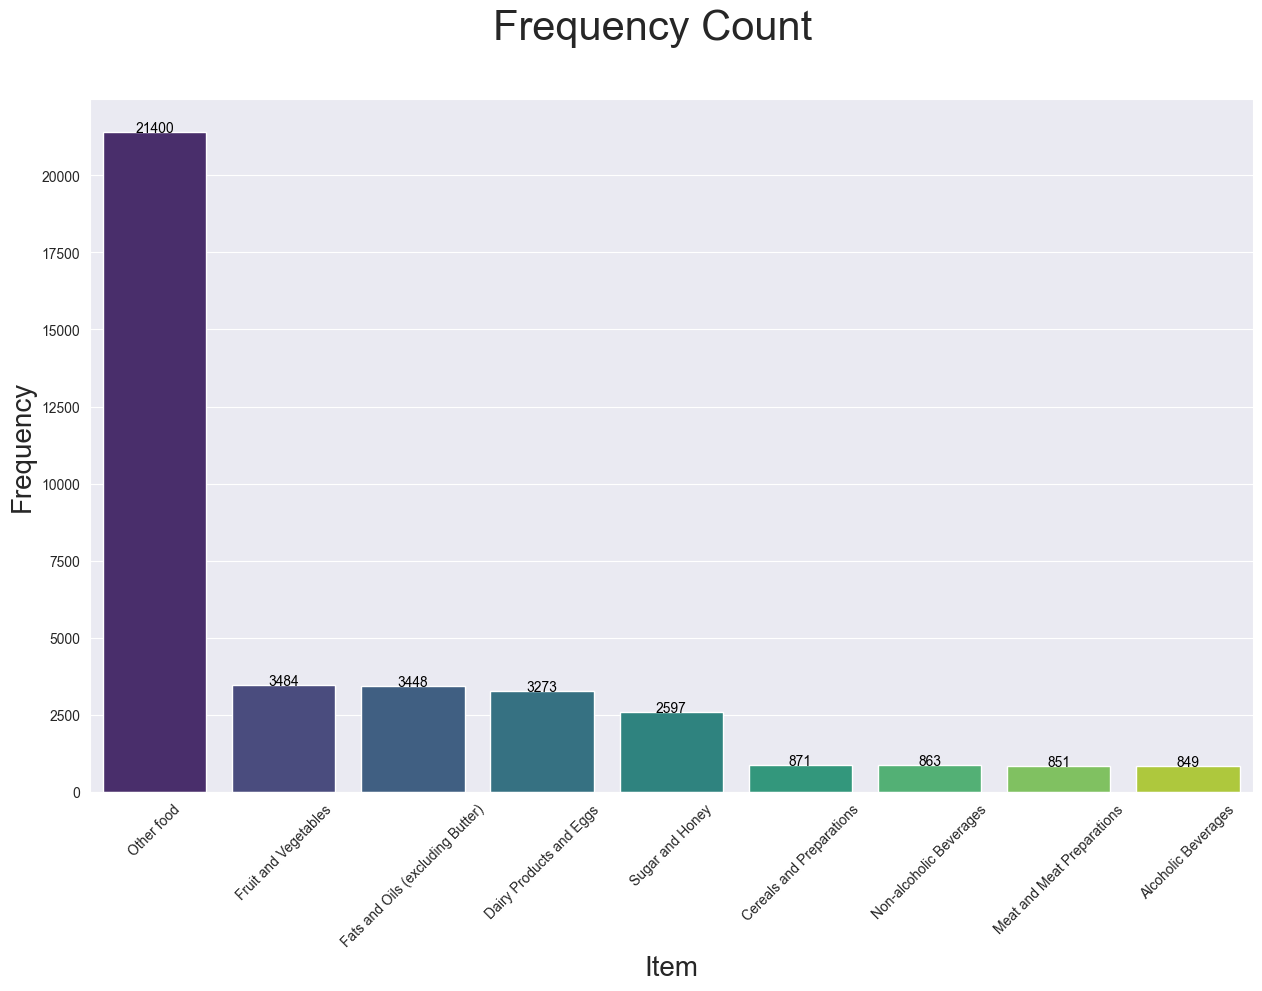

In [1451]:
# Count the values and reset the index
temp = merged_df['Item'].value_counts().reset_index()
temp.columns = ['Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")   

plt.xlabel('Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

# 5. Feature Selection and Engineering

In this section, I will perform feature selection and engineering on the merged data. I will perform the following steps:
- Feature Engineering - Create new features from the existing features such as lagged and interaction features
- Recursive Feature Elimination - Select the best features using recursive feature elimination

## 5.1 Feature Engineering

In this section, I will create new features from the existing features such as lagged and interaction features.

In [1452]:
# Create lagged features
merged_df['Total Export Crop Value in 1000 US$_lag_1'] = merged_df.groupby('Area')['Total Export Crop Value in 1000 US$'].shift(1)
merged_df['Total Export Crop Value in 1000 US$_lag_2'] = merged_df.groupby('Area')['Total Export Crop Value in 1000 US$'].shift(2)
merged_df['Total Export Crop Value in 1000 US$_lag_3'] = merged_df.groupby('Area')['Total Export Crop Value in 1000 US$'].shift(3)
merged_df['Total Export Crop Value in 1000 US$_lag_4'] = merged_df.groupby('Area')['Total Export Crop Value in 1000 US$'].shift(4)
merged_df['Total Export Crop Value in 1000 US$_lag_5'] = merged_df.groupby('Area')['Total Export Crop Value in 1000 US$'].shift(5)

In [1461]:
# Create interaction features
merged_df['Fertiliser Use x Pesticides Use'] = merged_df['Total Fertiliser Use in Tonnes'] * merged_df['Total Pesticides Use in Tonnes']
merged_df['Land Use x Fertiliser Use'] = merged_df['Agricultural Land in Hectares'] * merged_df['Total Fertiliser Use in Tonnes']
merged_df['Land Use x Pesticides Use'] = merged_df['Agricultural Land in Hectares'] * merged_df['Total Pesticides Use in Tonnes']

# Calculate mean values
mean_values = merged_df.select_dtypes(np.number).mean()
# Impute missing values
merged_df = merged_df.fillna(mean_values)

# Check for missing values
merged_df.isnull().sum()

Area                                                0
Item                                                0
Year                                                0
Total Import Crop Value in 1000 US$                 0
Total Export Crop Value in 1000 US$                 0
Total Import Quantity in Tonnes                     0
Total Export Quantity in Tonnes                     0
Temperature Change in Degrees Celsius               0
Total Pesticides Use in Tonnes                      0
Agricultural Land in Hectares                       0
Total Fertiliser Use in Tonnes                      0
Exchange Rate in National Currency per US Dollar    0
Total Export Crop Value in 1000 US$_lag_1           0
Total Export Crop Value in 1000 US$_lag_2           0
Total Export Crop Value in 1000 US$_lag_3           0
Total Export Crop Value in 1000 US$_lag_4           0
Total Export Crop Value in 1000 US$_lag_5           0
Fertiliser Use x Pesticides Use                     0
Land Use x Fertiliser Use   

In [ ]:
# Describe the merged dataframe
merged_df.describe()

### 4.7.2 Correlation Analysis

In this section, I will perform correlation analysis on the merged data. I will generate a correlation matrix and plot a heatmap to visualise the correlations between the variables.

In [ ]:
# Generate a correlation matrix
numeric_df = merged_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

In [ ]:
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation Heatmap")

sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()

In [ ]:
# Print the correlation values with the target variable
correlation_matrix['Total Export Crop Value in 1000 US$']

In [ ]:
# # Perform recursive feature elimination to select the best features
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# 
# # Define the model
# model = RandomForestRegressor()
# 
# # Perform recursive feature elimination
# rfe = RFE(model, n_features_to_select=6)
# X = merged_df.drop(columns=['Total Export Crop Value in 1000 US$', 'Area', 'Year', 'Item'])
# y = merged_df['Total Export Crop Value in 1000 US$']
# rfe.fit(X, y)
# 
# # Get the selected features
# selected_features = X.columns[rfe.support_]
# selected_features

In [ ]:
# Drop the unnecessary columns
merged_df = merged_df.drop(columns=['Temperature Change in Degrees Celsius'])

# 7. Multi-Layer Perceptron (MLP) Model

In this section, I will build a Multi-Layer Perceptron (MLP) model to predict the total export crop value in 1000 US$ using the merged data. I will perform the following steps:
- Split the data into features and target variable
- Split the data into training and testing sets
- Encode the categorical variables (Item and Area)
- Scale the features
- Train the MLPRegressor
- Predict on the test set
- Evaluate the model
- Plot the results

## 7.1 Preprocess Data

In this section, I will preprocess the data for the MLPRegressor model using a function. I will perform the following steps:
- Separate the features and target variable
- Apply log transformation to the numeric features
- Z-score based outlier removal
- Scale the numeric features
- Encode the categorical features
- Combine the numeric and categorical features back into a single array
- Return the processed data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

# Define the preprocessing pipeline
class DebugPrinter(BaseEstimator, TransformerMixin):
    def __init__(self, message):
        self.message = message

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        # Print the message and show some information about X
        print(self.message, "Shape:", X.shape)
        return X  # pass through without changes

def log_transform(x):
    return np.log1p(x)  # example transformation

log_transformer = FunctionTransformer(log_transform)

class FunctionTransformerWithNames(FunctionTransformer):
    def get_feature_names_out(self, input_features=None):
        return input_features
    
# Build the preprocessing pipeline
def build_preprocessing_pipeline(numeric_features, categorical_features, year):
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformerWithNames(np.log1p)),
    ('scaler', MinMaxScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    year_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])

    # Column Transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('year', year_transformer, year)
        ]
    )
    
    return preprocessor

## 7.2 Time Series Split and Model Training

In this section, I will split the data into training and testing sets using a time series split. I will then preprocess the data using the preprocess_data function and train the MLPRegressor model.

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Define the features and target variable sorted by for time series split
X = merged_df.drop(columns=['Total Export Crop Value in 1000 US$'])
y = merged_df['Total Export Crop Value in 1000 US$']

# Define the numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).drop(columns='Year').columns.tolist()
categorical_features = ['Area', 'Item']
year = ['Year']

preprocessing_pipeline = build_preprocessing_pipeline(numeric_features, categorical_features, year)

# Define the MLPRegressor model
model = MLPRegressor(random_state=42, activation= 'relu', alpha= 0.001, hidden_layer_sizes= (300,), learning_rate= 'constant', max_iter= 1000, solver= 'adam')

regressor_with_log_transformed_target = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p, inverse_func=np.expm1,check_inverse=False)

# Define the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('model', regressor_with_log_transformed_target)
])

# Define the time series split
tscv = TimeSeriesSplit(n_splits=5)

# List for storing mae values
mae_values = []

# Split the data into training and testing sets
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
    X_test_transformed = preprocessing_pipeline.transform(X_test)
    
    # Fit the pipeline
    mlp_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp_pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)
    print(f'Mean Absolute Error: {mae}')
    
# Calculate the mean mae
mean_mae = np.mean(mae_values)
print(f'Mean MAE: {mean_mae}')


## 7.6 Plot the Results

In this section, I will plot the results of the MLPRegressor model. I will use the following plots:
- Scatter plot of predicted vs actual total export crop value
- Density plot of actual vs predicted values
- Scatter plots of predicted vs actual total export crop value by item

### 7.6.1 Scatter Plot of Predicted vs Actual Total Export Crop Value

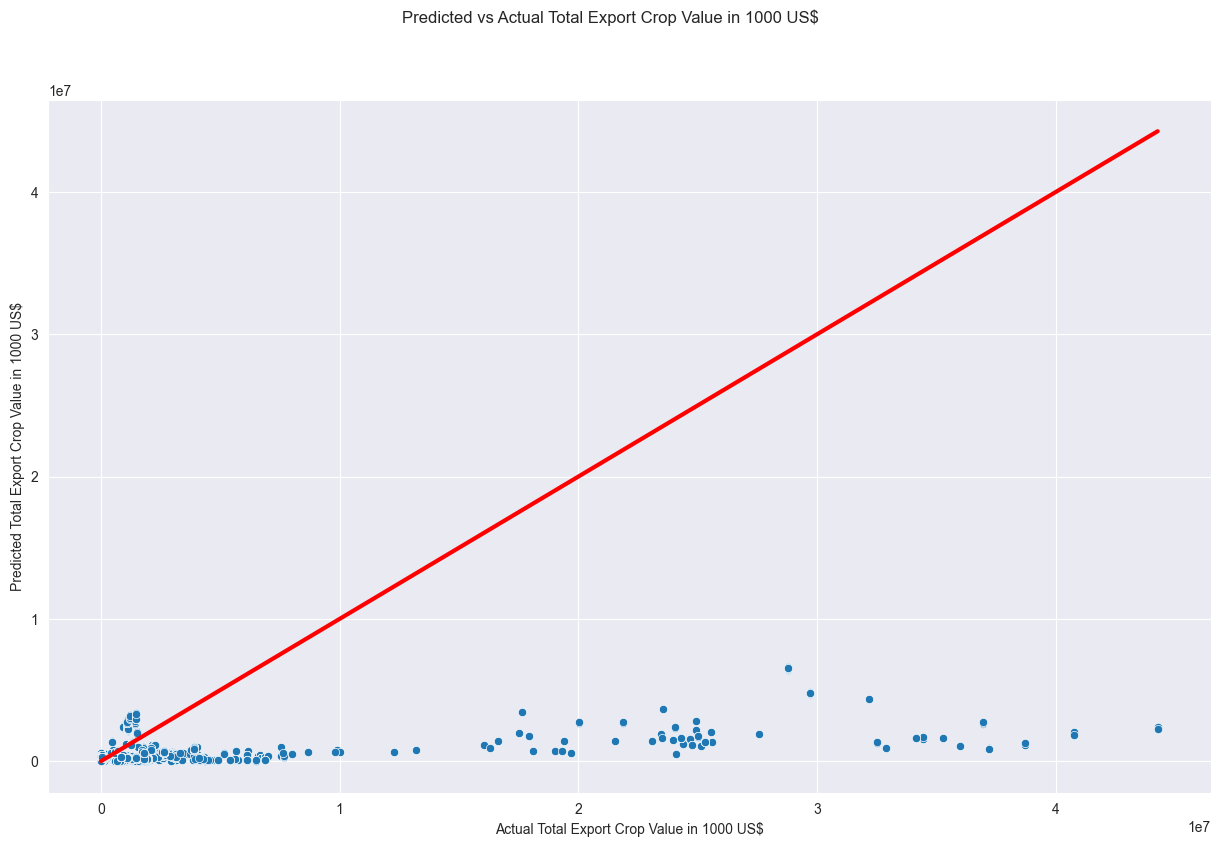

In [1454]:
# Plotting the results as a scatter plot
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$")
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
# Add a line for predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Total Export Crop Value in 1000 US$")
plt.ylabel("Predicted Total Export Crop Value in 1000 US$")
plt.show()

### 7.6.2 Density Plot of Actual vs Predicted Values

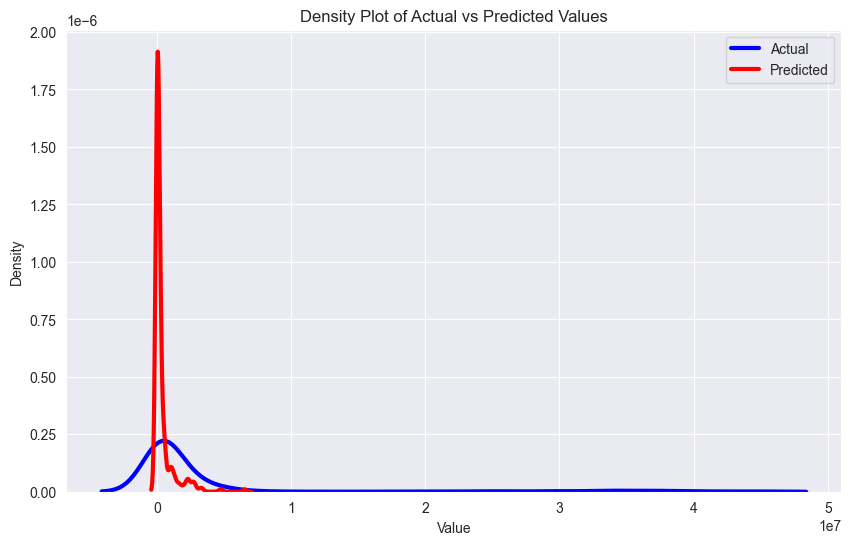

In [1455]:
# Plot the density plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', linewidth=3)
sns.kdeplot(y_pred, label='Predicted', color='red', linewidth=3)
plt.title('Density Plot of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 7.6.3 Scatter Plots of Predicted vs Actual Total Export Crop Value by Item

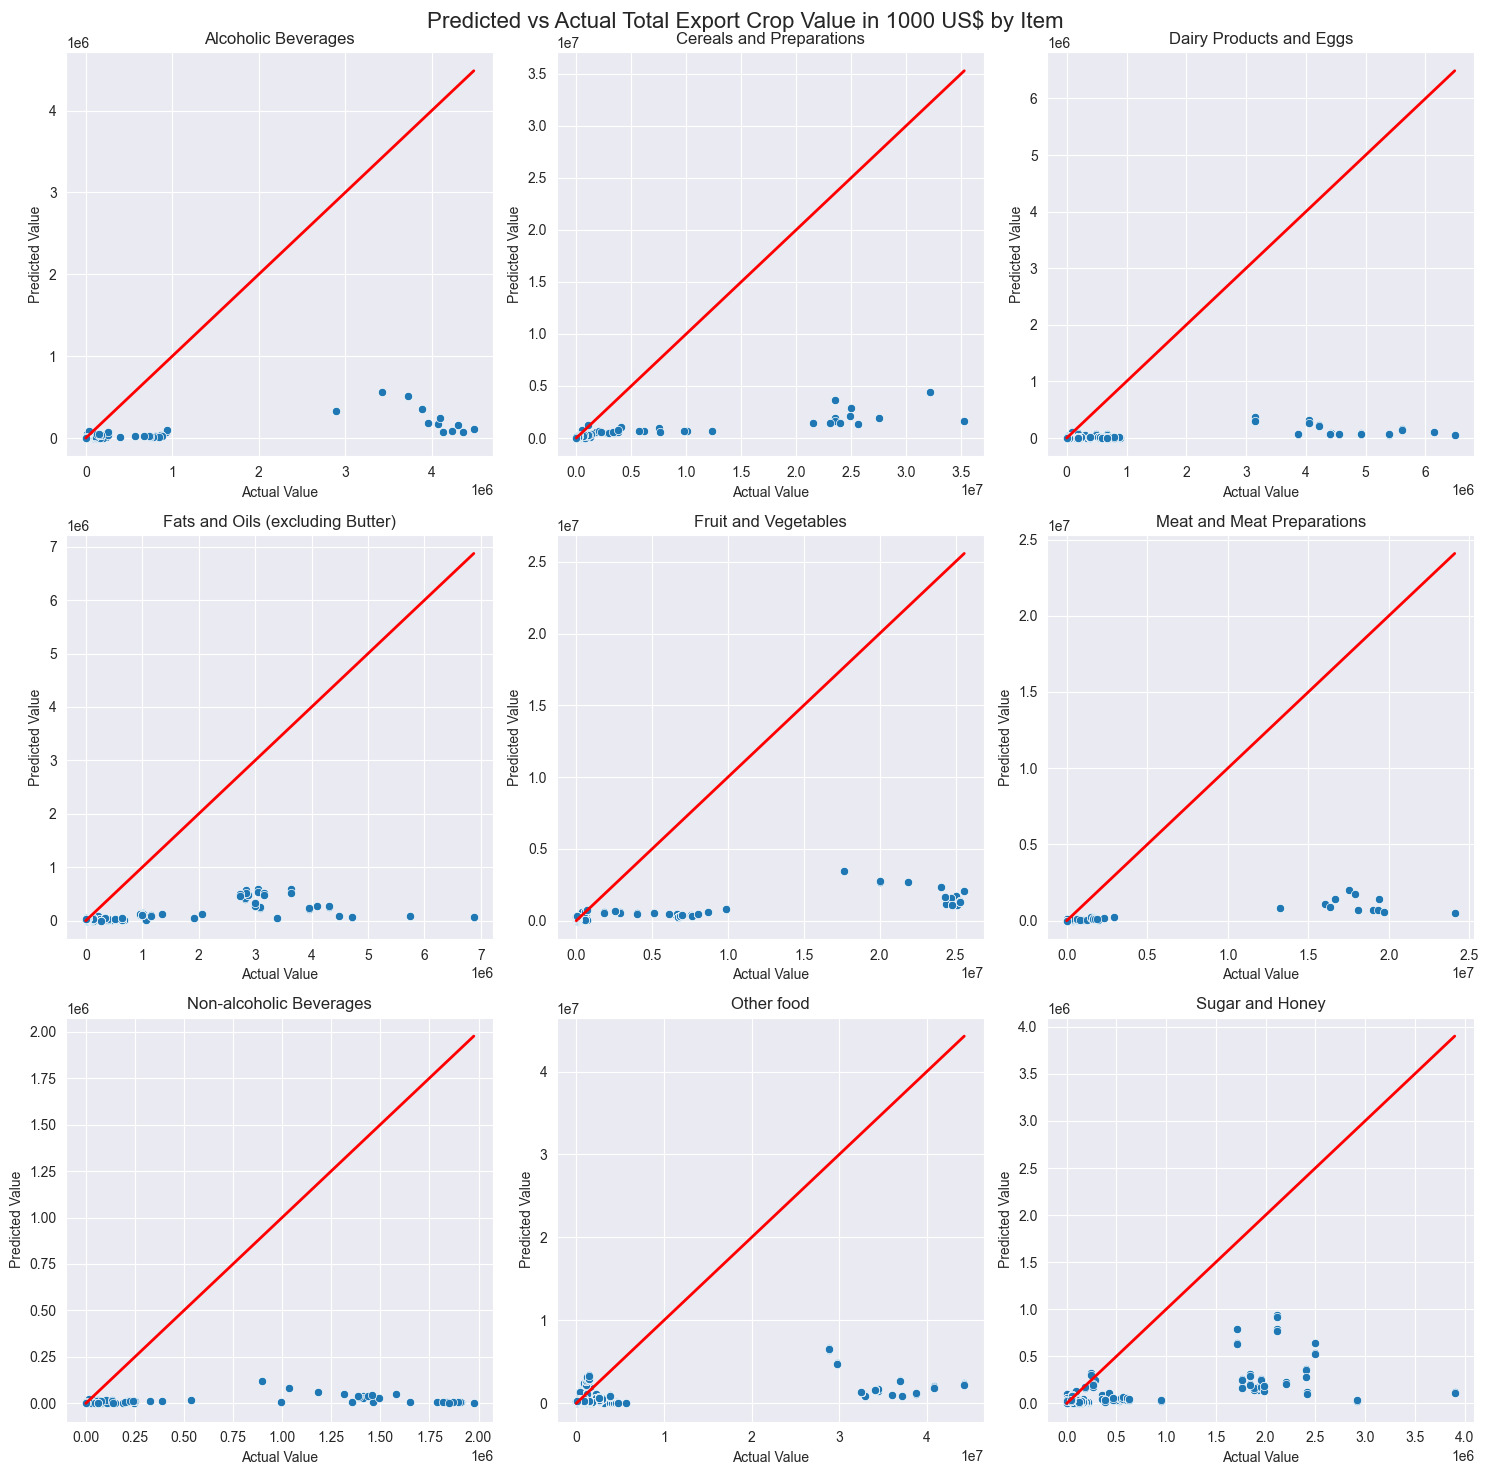

In [1456]:
# Convert output to a pandas Series for easy manipulation
y_pred_series = pd.Series(y_pred, index=y_test.index)
feature_names = mlp_pipeline.named_steps['preprocessor'].get_feature_names_out()
# Removes the step and __ separator from the feature names
feature_names = [name.split('__')[1] if '__' in name else name for name in feature_names]


# Convert the transformed X_test into a DataFrame for easier handling
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

# Convert y_pred to a pandas Series for easy manipulation
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Get only 'Item_' columns, filtering out any 'Area_' prefixed columns
item_features = [name for name in feature_names if 'Item_' in name]

# Calculate number of plots based on item features
n_items = len(item_features)
cols = 3
rows = int(np.ceil(n_items / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
fig.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$ by Item", fontsize=16)

for i, feature_name in enumerate(item_features):
    if i < len(axes.flatten()):
        ax = axes.flatten()[i]
        mask = X_test_df[feature_name].astype(bool)  # Filter out only rows where the item is present
        sns.scatterplot(x=y_test[mask], y=y_pred_series[mask], ax=ax)
        ax.plot([y_test[mask].min(), y_test[mask].max()], [y_test[mask].min(), y_test[mask].max()], color='red', lw=2)
        ax.set_title(feature_name.replace('Item_', '').replace('_', ' '))
        ax.set_xlabel("Actual Value")
        ax.set_ylabel("Predicted Value")

# Hide unused subplots
for j in range(i + 1, rows * cols):
    if j < len(axes.flatten()):
        axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

## 7.7 Check for Overfitting

In this section, I will check for overfitting in the MLPRegressor model by comparing the training and testing scores. If the training score is significantly higher than the testing score, it indicates overfitting.


In [1457]:
# Get the training score
training_score = mlp_pipeline.score(X_train, y_train)
print(f'Training Score: {training_score}')

# Get the testing score
testing_score = mlp_pipeline.score(X_test, y_test)
print(f'Testing Score: {testing_score}')

# Check for overfitting
if training_score - testing_score > 0.1:
    print('The model is overfitting')
else:
    print('The model is not overfitting')

Training Score: 0.9889015085015544
Testing Score: -0.0014897466180059382
The model is overfitting


## 7.8 Hyperparameter Tuning

In this section, I will perform hyperparameter tuning on the MLPRegressor model using GridSearchCV. I will tune the following hyperparameters:
- Hidden Layer Sizes
- Activation Function
- Solver
- Alpha
- Learning Rate
- Max Iterations

In [1458]:
# from sklearn.model_selection import GridSearchCV
# # Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(100,), (200,), (300,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': [1000, 2000, 3000]
# }
# 
# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=4)
# # Perform the grid search
# grid_search.fit(X_train_scaled, y_train)
# # Get the best parameters
# best_params = grid_search.best_params_
# print(f'Best Parameters: {best_params}')
# # Get the best model
# best_model = grid_search.best_estimator_
# # Predict on the test set
# y_pred_best = best_model.predict(X_test_scaled)
# # Evaluate the best model
# r2_score_best = best_model.score(X_test_scaled, y_test)
# print(f'R^2 Score of Best Model: {r2_score_best}')
# 
# # Get the training score of the best model
# training_score_best = best_model.score(X_train_scaled, y_train)
# print(f'Training Score of Best Model: {training_score_best}')


## 7.9 Save and Load the Model

In this section, I will save the trained MLPRegressor model to a file and load it back to make predictions.

In [1459]:
# Save the model to a file
import joblib
joblib.dump(model, 'mlp_model.pkl')

['mlp_model.pkl']

In [1460]:
# Load the model from the file
model = joblib.load('mlp_model.pkl')
# Make predictions
y_pred_loaded = model.predict(X_test)
# Calculate and print the mean absolute error
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
print(f"Mean Absolute Error of Loaded Model: {mae_loaded}")
# Calculate and print the R^2 score
r2_score_loaded = model.score(X_test, y_test)
print(f"R^2 Score of Loaded Model: {r2_score_loaded}")

NotFittedError: This MLPRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.